## About Dataset

The Dataset is a collection of customers reviews along with their summary and score. The dataset contains 60k records as per the problem statement and covers a wide range of product categories, including different products.

Each review in the dataset includes the reviewer's overall rating of the product on a scale of 1 to 5, as well as additional summary comments about the product. The dataset also includes information about the productid, userid and users profile name, including Helpfulness Numerator and Helpfulness Denominator.

## Problem Statement 3:

You are working in an e-commerce company, and your company has put forward a task to analyze the customer reviews for various products. You are supposed to create a report that classifies the products based on the customer reviews.

**Dataset Information:
The Reviews.csv dataset contains 60145 rows and 10 columns.**

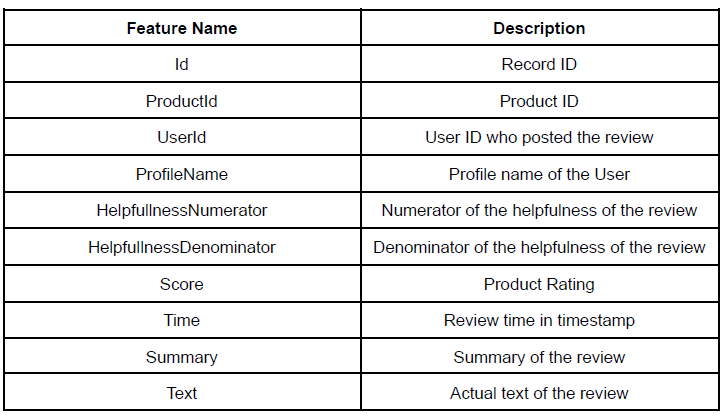

**1. Find various trends and patterns in the reviews data, create useful insights that best describe the product quality.**

**2. Classify each review based on the sentiment associated with the same.**

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erpra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\erpra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erpra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


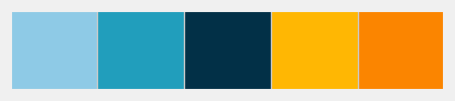

In [1]:
# data manipulation
import re
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

import string
string.punctuation
import nltk
# Stop words present in the library
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer


# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

# Model Evaluation
from sklearn import metrics

# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"]
palette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()


import warnings
warnings.filterwarnings('ignore')

# <center> Data Exploration </center>

In [2]:
reviews = pd.read_csv(r"C:\Users\erpra\Documents\Capstone_Project_2_DSAI\Reviews.csv")
reviews.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [3]:
df = reviews.loc[:, ['Time', 'ProductId', 'Summary', 'Text', 'Score']]
print(f"Shape of the dataset as per the problem statement:{df.shape}")

Shape of the dataset as per the problem statement:(568454, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Time       568454 non-null  int64 
 1   ProductId  568454 non-null  object
 2   Summary    568427 non-null  object
 3   Text       568454 non-null  object
 4   Score      568454 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 21.7+ MB


In [5]:
# Checcking NA enteries count
df.isna().sum().sort_values(ascending=False)

Summary      27
Time          0
ProductId     0
Text          0
Score         0
dtype: int64

In [6]:
# dropping the null entries

df.dropna(inplace=True)

In [7]:
# again checking for the null entries
df.isna().sum().sort_values(ascending=False)

Time         0
ProductId    0
Summary      0
Text         0
Score        0
dtype: int64

In [8]:
print("The new shape of the dataset: ",df.shape)

The new shape of the dataset:  (568427, 5)


In [9]:
df['date'] = pd.to_datetime(df['Time'],unit='s')

Text(0.5, 1.0, 'Data Types')

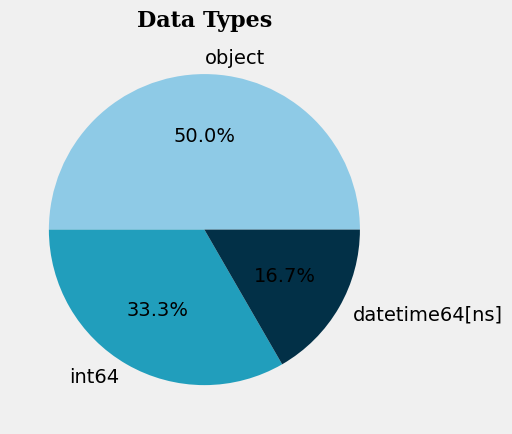

In [10]:
# sns pie plot for the data types available in the datasetb
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
# y label \
plt.ylabel('')
# set title with custom font
plt.title('Data Types', fontsize=16, fontweight='bold', fontdict={
    'fontsize': 18, 'fontfamily': 'serif', 'fontweight': 'bold'})

# <center> EDA & Data Preprocessing </center>

### 1.Rating Distribution

In [11]:
# observing the shape of the dataset for each rating
for i in range(1,6):
    print(f"Number enteries for Rating-'{i}' in the dataset: {df[df['Score'] == i].shape}\n")

Number enteries for Rating-'1' in the dataset: (52268, 6)

Number enteries for Rating-'2' in the dataset: (29744, 6)

Number enteries for Rating-'3' in the dataset: (42638, 6)

Number enteries for Rating-'4' in the dataset: (80655, 6)

Number enteries for Rating-'5' in the dataset: (363122, 6)



Text(0.5, 1.0, 'Rating Distribution in the Dataset')

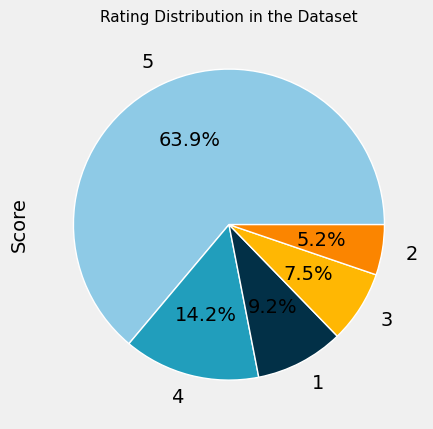

In [12]:
# sns pie plot for the data types available in the datasetb
df.Score.value_counts().plot.pie(autopct='%1.1f%%', 
                                 labeldistance=1.15, 
                                 colors=colors, 
                                 wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
# set title with custom font
plt.title('Rating Distribution in the Dataset', fontsize=11, fontdict={
    'fontsize': 18, 'fontfamily': 'sans', 'fontweight': 'light'})

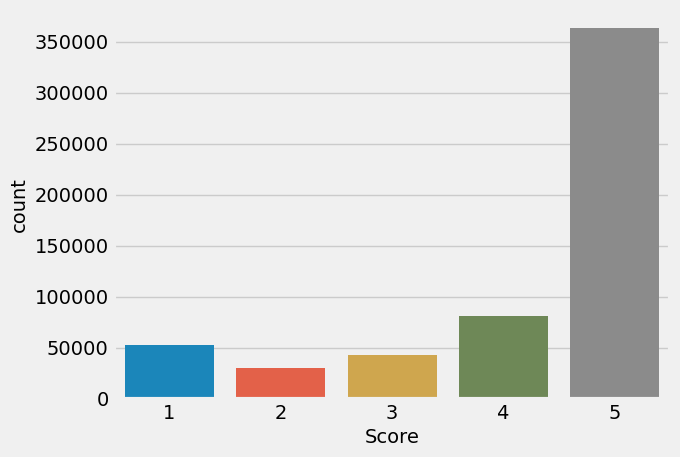

In [13]:
# visualising the reviews with rating counts
sns.countplot(x='Score', data=df)
plt.show()

**Inference:** Here, we can see that the datasets are biased, and the most of the reviews in the current dataset are classified for the Rating '5'.

### 2. Defining a function to create a balanced dataset.

In [14]:
# Generating a random shuffled subset out of the large data set as per the rating

def sample_subset(df, sample_size):
    df_r1 = df[df['Score'] == 1].sample(n=sample_size, random_state=42)
    df_r2 = df[df['Score'] == 2].sample(n=sample_size, random_state=42)
    df_r3 = df[df['Score'] == 3].sample(n=sample_size, random_state=42)
    df_r4 = df[df['Score'] == 4].sample(n=sample_size, random_state=42)
    df_r5 = df[df['Score'] == 5].sample(n=sample_size, random_state=42)

    new_df = pd.concat([df_r1, df_r2], axis=0, )
    new_df = pd.concat([new_df, df_r3], axis=0)
    new_df = pd.concat([new_df, df_r4], axis=0)
    new_df = pd.concat([new_df, df_r5], axis=0)
    
    new_df = new_df.sample(frac=1, random_state=42)
    new_df = new_df.reset_index(drop=True)
    
    print(f"The shape of the trimmed dataset: {new_df.shape}")
    
    return new_df

# return a dataset after renaming the required col_name
def rename_column(data, col_name, new_col_name):
    data.rename(columns={col_name : new_col_name}, inplace = True)
    return data

### Visualizing the distributin of words in review and summary

In [15]:
# returns word distribution histogram
def word_distribution(data, col_n, label, bins):
    plt.figure(figsize = (14,6))
    WordsPerReview = data[col_n].apply(lambda x: len(x.split(' ')))
#     print(WordsPerReview)
    sns.histplot(WordsPerReview,bins = bins, kde=False)

    plt.xlabel(label)
    plt.show()

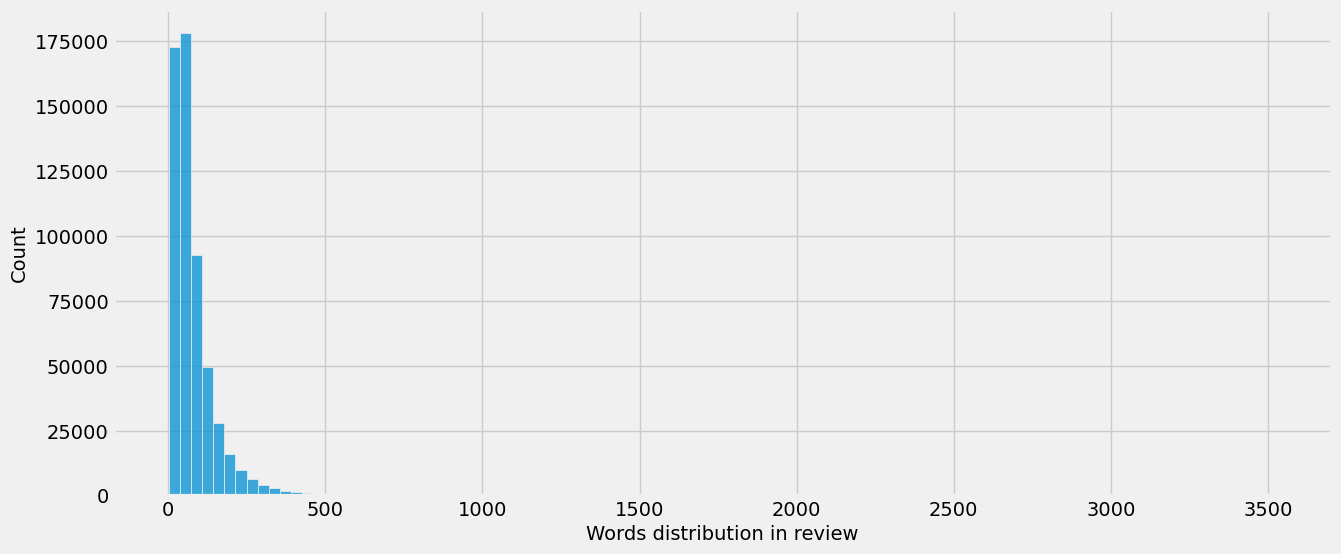

In [16]:
# plotting the word distribution for the Text colun
word_distribution(df, "Text", 'Words distribution in review', 100)

**Inference:** We can see the words per review is ranging between 0 to 500 in the Text column, and words per review is not evenly distributed. 

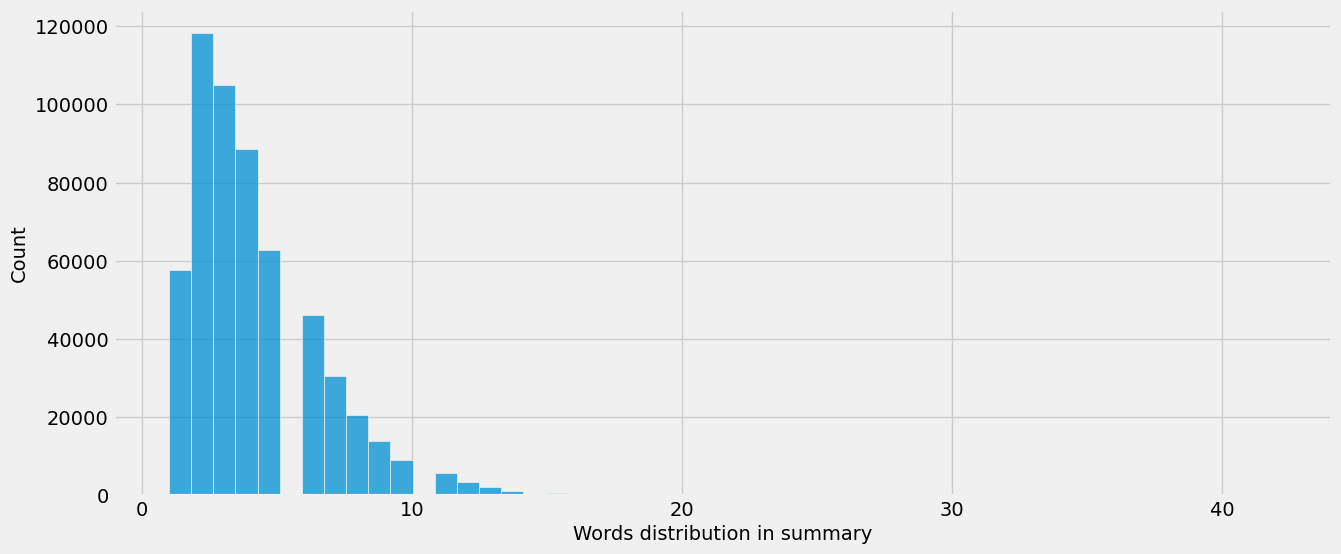

In [17]:
# plotting the word distribution for the Summary colun 
word_distribution(df, "Summary", 'Words distribution in summary', 50)

**Inference:** We can see the words per summary is ranging between 0 to 15 in the Summary column, and words per summary is also not equally distributed.

### 3. Cleaning Main Dataset

In [18]:
# dropping the time and date columns
df.drop(columns=['date','Time'] , axis=1, inplace=True)
df.head()

ProductId                Summary  \
0  B001E4KFG0  Good Quality Dog Food   
1  B00813GRG4      Not as Advertised   
2  B000LQOCH0  "Delight" says it all   
3  B000UA0QIQ         Cough Medicine   
4  B006K2ZZ7K            Great taffy   

                                                Text  Score  
0  I have bought several of the Vitality canned d...      5  
1  Product arrived labeled as Jumbo Salted Peanut...      1  
2  This is a confection that has been around a fe...      4  
3  If you are looking for the secret ingredient i...      2  
4  Great taffy at a great price.  There was a wid...      5

Dropping the Date and Time columns.

And the next steps is to create a column with length of words in each reviews and clean the text in the dataset. Which include several steps:

* Lowering the words
* Tokenize & removing punctuations
* POS tagging
* remove empty tokens
* remove words with number
* remove stop words
* Lemmatization
* Removing words with single letter
* Joining them

 *Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens.*

 *POS Tagging (Parts of Speech Tagging) is a process to mark up the words in text format for a particular part of a speech based on its definition and context. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word.*

 *Lemmatization is similar to Stemming but it brings context to the words. So it links words with similar meanings to one word.*

In [19]:
# creating a column for the review word count
df['word_count'] = df['Text'].apply(lambda x: len(x.split(' ')))

In [20]:
# dropping the rows having less words
df.drop(df[df['word_count'] <= 10].index, inplace=True)

In [21]:
from nltk.corpus import wordnet
from nltk import pos_tag

# return the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# return the clean text
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# function to clean data, as Text data having some links, special character, etc..
def clean_character(Review):
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub(r'"', '', Review)
    Review = re.sub('\[".*?\]', '', Review)
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'<br>', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

# function to lower the sentences
def lowercase_text(text):
    return text.lower()

# function to remove the function
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [22]:
# from tqdm import tqdm
# tqdm.pandas(desc="Cleaning text")

# # clean text data
# df["clean_text"] = df["Text"].progress_apply(lambda x: clean_text(x))

In [23]:
# df.to_csv('Review_CleanData.csv', index=False)

**Above 2 cells are executed and have expoted the cleaned dataset.**

In [24]:
df_new = pd.read_csv(r"C:\Users\erpra\Documents\Capstone_Project_2_DSAI\Capstone_Mandatory_2_3\Review_CleanData.csv")
df_new.head()

ProductId                Summary  \
0  B001E4KFG0  Good Quality Dog Food   
1  B00813GRG4      Not as Advertised   
2  B000LQOCH0  "Delight" says it all   
3  B000UA0QIQ         Cough Medicine   
4  B006K2ZZ7K            Great taffy   

                                                Text  Score  word_count  \
0  I have bought several of the Vitality canned d...      5          49   
1  Product arrived labeled as Jumbo Salted Peanut...      1          31   
2  This is a confection that has been around a fe...      4          99   
3  If you are looking for the secret ingredient i...      2          43   
4  Great taffy at a great price.  There was a wid...      5          30   

                                          clean_text  
0  have buy several of the vitality can dog food ...  
1  product arrive label jumbo salt peanuts...the ...  
2  this be confection that have be around few cen...  
3  if you be look for the secret ingredient in ro...  
4  great taffy at great price there be wide assor...

In [25]:
# dropping the null enteries
df_new.dropna(inplace=True)

In [26]:
# cleaning character, as still data have some special character and '<br>' with the cleaned review data
from tqdm import tqdm
tqdm.pandas(desc="Cleaning character from text")

# clean text data
df_new["clean_text"] = df_new["clean_text"].progress_apply(lambda x: clean_character(x))

Cleaning character from text: 100%|█████████████████████████████████████████| 568286/568286 [00:37<00:00, 15292.98it/s]


In [27]:
# cleaning the Summary column
from tqdm import tqdm
tqdm.pandas(desc="Cleaning Summary column")

# clean text data other two function, as summary data havn't data like Text column
df_new["Summary"] = df_new["Summary"].progress_apply(lambda x: lowercase_text(x))
df_new["Summary"] = df_new["Summary"].progress_apply(lambda x: remove_punctuation(x))

Cleaning Summary column: 100%|█████████████████████████████████████████████| 568286/568286 [00:02<00:00, 266072.54it/s]


In [28]:
word_count_clean = df_new['clean_text'].apply(lambda x: len(x.split(' ')))

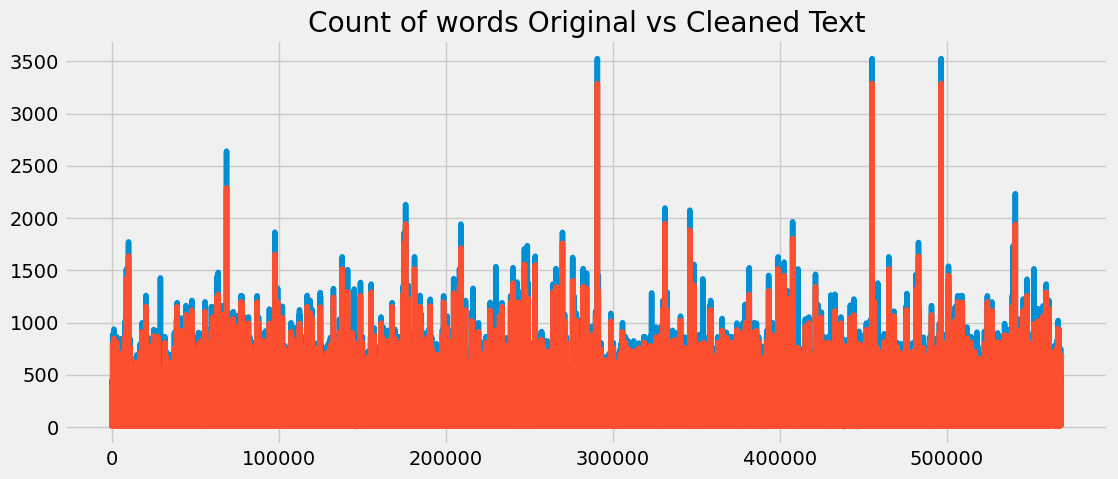

In [30]:
df_new['word_count'].plot(title='Count of words Original vs Cleaned Text', legend=False, figsize=(12, 5))
word_count_clean.plot(legend=False,figsize=(12, 5));

In [31]:
print(f"Overall count of words available for the Text column: {df['word_count'].sum()}")
print(f"Overall count of words available for the clean_text column: {word_count_clean.sum()}\n")
print(f"Inference: In cleaned review we have reduced {round((100 - (word_count_clean.sum()/df['word_count'].sum())*100), 2)}% of the total words.")

Overall count of words available for the Text column: 46614465
Overall count of words available for the clean_text column: 41839516

Inference: In cleaned review we have reduced 10.24% of the total words.


In [32]:
df_new.head()

ProductId                Summary  \
0  B001E4KFG0  good quality dog food   
1  B00813GRG4      not as advertised   
2  B000LQOCH0    delight says it all   
3  B000UA0QIQ         cough medicine   
4  B006K2ZZ7K            great taffy   

                                                Text  Score  word_count  \
0  I have bought several of the Vitality canned d...      5          49   
1  Product arrived labeled as Jumbo Salted Peanut...      1          31   
2  This is a confection that has been around a fe...      4          99   
3  If you are looking for the secret ingredient i...      2          43   
4  Great taffy at a great price.  There was a wid...      5          30   

                                          clean_text  
0  have buy several of the vitality can dog food ...  
1  product arrive label jumbo salt peanutsthe pea...  
2  this be confection that have be around few cen...  
3  if you be look for the secret ingredient in ro...  
4  great taffy at great price there be wide assor...

To clean textual data, we call our custom 'clean_text' function that performs several transformations:

* lower the text
* tokenize the text (split the text into words) and remove the punctuation
* remove useless words that contain numbers
* remove useless stop words like 'the', 'a' ,'this' etc.
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
* lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

**Now that we have cleaned our data, we can do some feature engineering for our modelization part & analysis to understand the sentiment of reviews.** ⬆⬆

### 4. Product Analysis as per the score

Now, we will classify the products as per their ratings and visualize the products as per their ratings count. Will find:
* Number of unique products
* Highest & lowest rating count
* Most and least popular products
* Distribution of ratings according to the products

In [33]:
print(f"The number of unique products in the dataset: {df_new.ProductId.nunique()}")

print("\nCount of top 15 products in the Dataset as per their rating.\n")
df_new.ProductId.value_counts()[0:15]

The number of unique products in the dataset: 74243

Count of top 15 products in the Dataset as per their rating.



B007JFMH8M    913
B002QWP8H0    632
B0026RQTGE    632
B002QWP89S    632
B002QWHJOU    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0013NUGDE    564
B007M832YY    564
B0026KPDG8    564
B001RVFEP2    564
B001RVFERK    564
B006HYLW32    564
B0026KNQSA    564
Name: ProductId, dtype: int64

In [34]:
# function to return the sentiment 
def categorise_sentiment(score):
    """ categorise the score value as Very-unsatisfied (1), Unsatisfied (2), 
        Neutral (3), Satisfied (4) and Very-satisfied (5) based on given score """
    if score == 1:
        label = 'Very-unsatisfied'
    elif score == 2:
        label = 'Unsatisfied'
    elif score == 3:
        label = 'Neutral'
    elif score == 4:
        label = 'Satisfied'
    else:
        label = 'Very-satisfied'
    return label

# new column with sentiment label based on Score column
df_new['sentiment'] = df_new['Score'].apply(lambda x: categorise_sentiment(x))

Categorises the Score with sentiments, which is,

* Very-unsatisfied (1)
* Unsatisfied (2)
* Neutral (3)
* Satisfied (4)
* Very-satisfied (5)

Next, Visualizing the each products as per their sentiments, for this, I will create a separate dataset with the number of times a product is rated. 

In [35]:
import plotly.express as px
import plotly.graph_objects as go

# creating a list of total products
ProductList = df_new.ProductId.value_counts().index

# function will return sorted dataframe with column --> 'ProductId','Score','sentiment'
def create_product_data(df, product_list, product):
    # setting condition to be executed when a product found in the dataset 
    if product in product_list:
        # storing the specific product data with Score and sentiment
        prod_data = df[df['ProductId'] == product].loc[:,['ProductId','Score','sentiment']]
        return prod_data

    else:
        # give error if no product found
        print("ERROR! Please enter a valid ProductId.")

# creating a function to plot pie-chart as per the user rating         
def pie_chart(df, product_list,product_name):
    # calling function to obtain required dataset
    data = create_product_data(df_new, ProductList, product_name)
    
    # setting title
    title = f"Rating/Sentiment Analysis Product:{product_name}"
    
    # plotting pie-chart
    fig = px.pie(data.sentiment.value_counts(), 
                 values=data.sentiment.value_counts().values, 
                 labels = data.sentiment.value_counts().index, 
                 names=data.sentiment.value_counts().index,
                 title=title,
                 color_discrete_sequence=px.colors.sequential.RdBu)
    # setting x & y axis label
    fig.update_traces(hole=.3,textposition='inside', textinfo='percent+label')
    
    fig.show()
    

# creating a function to plot bar-graph to visualize count of different sentiment
def bar_chart(df, product_list,product_name):
    # creating the dataset
    data = create_product_data(df_new, ProductList, product_name)
    
    # setting title
    title = f"Count of Sentiments/Product:{product_name}"
    
    # plotting bar graph
    fig = px.bar(x=data.sentiment.value_counts().values, 
                 y=data.sentiment.value_counts().index,
                 title=title,
                 text_auto=True)
    
    # updating x & y axis label
    fig.update_layout(xaxis_title="Count",yaxis_title="Sentiments",legend_title=f"{product_name}")
    
    fig.show()
    
    
    if 5 in data.value_counts().index[0]:
        print("\033[1mInference: Most of the users are Very-Satisfied, so, Product quality is Excellent.")
    elif 4 in data.value_counts().index[0]:
        print("\033[1mInference: Most of the users are Satisfied, so, Product quality is Very Good.")
    elif 3 in data.value_counts().index[0]:
        print("\033[1mInference: Most of the users are rated 3 and Product quality said to be Good/Acceptable.")
    elif 2 in data.value_counts().index[0]:
        print("\033[1mInference: Most of the users are Unsatisfied, so, Product quality is Poor.")
    else:
        print("\033[1mInference: Most of the users are Highly-Unsatisfied, so, Product quality is Very poor.")

In [36]:
# plotting for the product --> B002QWP8H0
pie_chart(df_new, ProductList, 'B002QWP8H0')
bar_chart(df_new, ProductList, 'B002QWP8H0')

Inference: Most of the users are Very-Satisfied, so, Product quality is Excellent.


In [37]:
# plotting for the product --> B001EO5Q64
pie_chart(df_new, ProductList, 'B001EO5Q64')
bar_chart(df_new, ProductList, 'B001EO5Q64')

Inference: Most of the users are Very-Satisfied, so, Product quality is Excellent.


In [38]:
# plotting for the product --> B001LR2CU2
pie_chart(df_new, ProductList, 'B001LR2CU2')
bar_chart(df_new, ProductList, 'B001LR2CU2')

Inference: Most of the users are Very-Satisfied, so, Product quality is Excellent.


In [39]:
# plotting for the product --> B0043O4BKO
pie_chart(df_new, ProductList, 'B0043O4BKO')
bar_chart(df_new, ProductList, 'B0043O4BKO')

Inference: Most of the users are Satisfied, so, Product quality is Very Good.


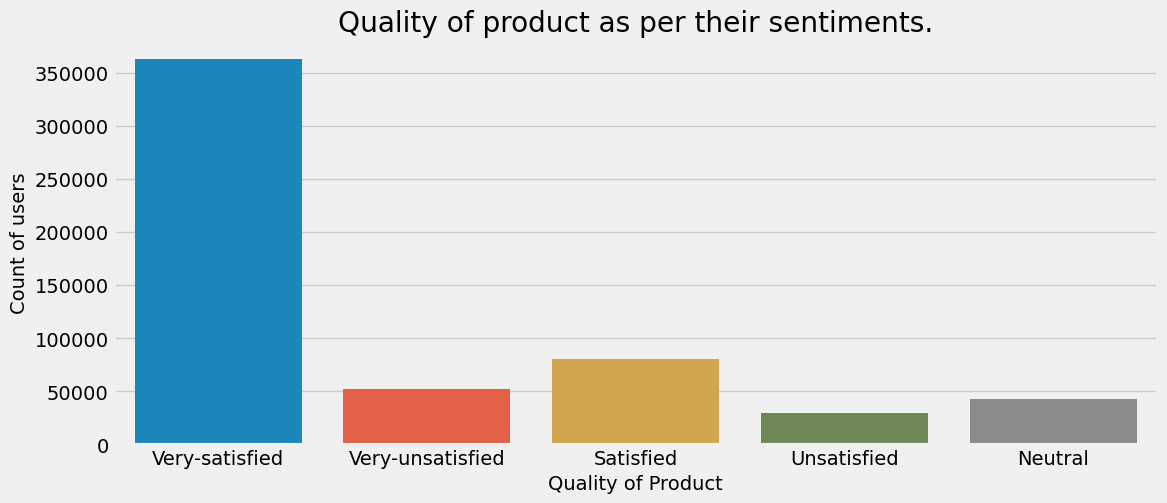

In [40]:
# visualising the sentiments 
plt.figure(figsize=(12,5))
sns.countplot(x='sentiment', data=df_new)
plt.title('Quality of product as per their sentiments.')
plt.xlabel('Quality of Product')
plt.ylabel('Count of users')
plt.show()

**Inferences:** Here, Most of product have best quality based on the user's sentiments.

In [41]:
def rating_count(x):
    prod_rating_count = df_new.ProductId.value_counts().sort_values(ascending=True)
    count = 0
    c_list = list(prod_rating_count.values)

    if x == 1:
        for i in range(len(df_new.ProductId.value_counts().index)):
            if c_list[i] == 1:
                count+=1
    else:
        for i in range(len(df_new.ProductId.value_counts().index)):
            if c_list[i] <= x:
                count+=1
    
    per = count/len(df_new.ProductId.value_counts().index)*100
    print(f"The count of product rated {x} times or less is {count} and {round(per, 2)}% of total products are rated only {x} times.")

In [42]:
rating_count(1); print()
rating_count(10); print()
rating_count(50); print()
rating_count(100); print()
rating_count(500)

The count of product rated 1 times or less is 30394 and 40.94% of total products are rated only 1 times.

The count of product rated 10 times or less is 64630 and 87.05% of total products are rated only 10 times.

The count of product rated 50 times or less is 72444 and 97.58% of total products are rated only 50 times.

The count of product rated 100 times or less is 73387 and 98.85% of total products are rated only 100 times.

The count of product rated 500 times or less is 74214 and 99.96% of total products are rated only 500 times.


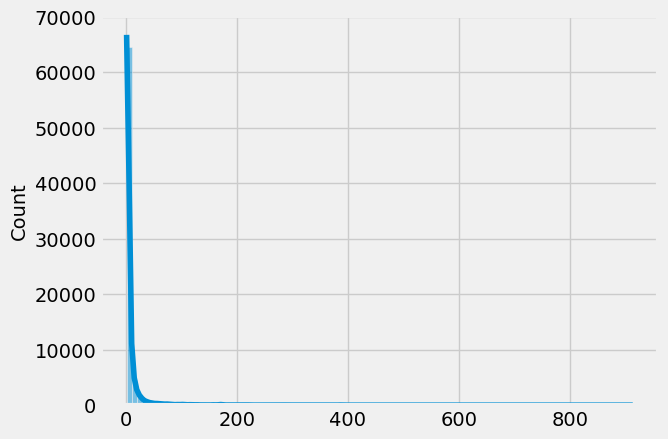

In [43]:
sns.histplot(df_new.ProductId.value_counts().values, bins = 100, kde=True);

**Inference:**

* Here, we can say most of the product's having more then 80% rating as 'Very-satisfied'.
* Almost 41% of total products are rated only once by the user, which is 30394 out of 74243.
* And 87% of total products are rated 10 times of less by the user, which is 64630 out of 74243.
* Only 10% of overall products are more frequently used & rated by the users.
* 'B007JFMH8M' product is mostly rated and most popular in all. Also, 30394 products are least popular and rated only once by the users. 
* So, we can say that 30394 products are least purchased products or least rated and less popular between all.
* With this analysis we can also categorise the product's quality as per their sentiment/score.

Above analysis clarify that the distribution of rating count for each products is not even or we can say skewed.

# <center> Feature Engineering </center>

In [44]:
# creating balanced dataset having equal enteries as per their classes/score/rating
sample_df = sample_subset(df_new, 12029)
sample_df.head()

The shape of the trimmed dataset: (60145, 7)


ProductId                               Summary  \
0  B003ZNXCMW                         made in china   
1  B000SMN0DO             no more postum withdrawal   
2  B000FFRTVI               beware of the odd taste   
3  B001M074LK  different packaging different coffee   
4  B001E5E3LW                           awful taste   

                                                Text  Score  word_count  \
0  Great product but made in China. Once I realiz...      3          46   
1  Maybe it's been too long since I've been able ...      5          77   
2  I bought this product along with Dr. McDougall...      1          91   
3  Beware - if you used Go Hazelnuts coffee befor...      2          55   
4  I cannot beleive the reviews here - it does ta...      1          35   

                                          clean_text         sentiment  
0  great product but make in china once realize t...           Neutral  
1  maybe its be too long since ive be able to dri...    Very-satisfied  
2  buy this product along with dr mcdougalls righ...  Very-unsatisfied  
3  beware if you use go hazelnuts coffee before a...       Unsatisfied  
4  cannot beleive the review here it do taste and...  Very-unsatisfied

In [45]:
sample_df = sample_df[['Summary', 'clean_text', 'Score']]
sample_df

Summary  \
0                                      made in china   
1                          no more postum withdrawal   
2                            beware of the odd taste   
3               different packaging different coffee   
4                                        awful taste   
...                                              ...   
60140                                     love these   
60141                        good product bad bottle   
60142  tasted like plastic instructions not readible   
60143                           eat at your own risk   
60144            best sugar free syrup on the market   

                                              clean_text  Score  
0      great product but make in china once realize t...      3  
1      maybe its be too long since ive be able to dri...      5  
2      buy this product along with dr mcdougalls righ...      1  
3      beware if you use go hazelnuts coffee before a...      2  
4      cannot beleive the review here it do taste and...      1  
...                                                  ...    ...  
60140  these chocolate toffee cover macadamia nut be ...      5  
60141  the most important thing about this product be...      4  
60142  taste like plastic the texture be so strange y...      1  
60143  kind bar taste great and pack nutritional punc...      2  
60144  ive try several popular brand include artisan ...      5  

[60145 rows x 3 columns]

# 1. Word based Feature Engineering

## Tokenization ##
The entries for the `clean_text` and `Summary` column are extracted to make up our *corpora*, which is simply a collection of all our documents. Each review is then transformed into an ordered list of words. This is the process of *tokenization* – the document is broken down into individual words or tokens.

Our tokenized sample review is below:

In [46]:
corpora = sample_df["clean_text"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[5674])

['love', 'these', 'bar', 'the', 'only', 'reason', 'they', 'dont', 'get', 'star', 'be', 'their', 'price', 'try', 'to', 'save', 'money', 'by', 'buy', 'them', 'here', 'instead', 'of', 'store', 'but', 'it', 'turn', 'out', 'the', 'difference', 'in', 'price', 'be', 'nearly', 'irrelevant', 'cheap', 'but', 'not', 'as', 'much', 'you', 'would', 'thinkanyway', 'taste', 'and', 'quality', 'be', 'great']


In [47]:
corpora_summary = sample_df["Summary"].values
tokenized_summary = [corpus.split(" ") for corpus in corpora_summary]

print(tokenized_summary[14634])

['very', 'disappointed', '', 'this', 'is', '', 'a', 'very', 'sweet', 'jelly', 'with', 'an', 'odd', 'texture']


## Phrase Modeling ##
Since order of words matter in most NLP models, it is often helpful to group neighboring words that appear to convey one meaning as though they are a single word, like *jelly*.

To be considered a *phrase*, the number of times that two words should appear next to each other is set to at least `300`. The *threshold* then takes that minimum and compares it to the total number of token instances in the corpora. The higher the threshold, the more often two words must appear adjacent to be grouped into a phrase.

In [48]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

### Unigrams ###
Unigrams are single pieces of tokens. The code below takes all the unique words from the entire corpora and prints a sample:

In [49]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['reviewsbr', 'vinter', 'goodmy', 'atrociousbr', 'buzzing', 'rattling', 'residuestain', 'izzebr', 'aig', 'wonderingyes', 'sniffedlicked', 'accompaniement', 'timeline', 'seedsnot', 'easilygraspable', 'saltierbr', 'okwas', 'quittingand', 'penetration', 'practioner', 'rare', 'wwould', 'lightly', 'unpleasant', 'spicesinccom', 'resolidified', 'diety', 'forzen', 'chipable', 'viability', 'preetier', 'mountainy', 'purposefully', 'martinilike', 'substitutesbr', 'da', 'breaking', 'sweetwith', 'daybreakmorning', 'kh', 'stiffen', 'refreshes', 'semihard', 'pizzazz', 'squishy', 'blandish', 'nycnakedsirens', 'reely', 'chunkiness', 'cordiali']


### Bigrams ###
Bigrams are generated from using the *gensim* phraser. Only those that pass the `bi_gram` criteria are considered.

The code below takes all the unique bigram phrases from the entire corpora:

In [50]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['pack_of', 'no_one', 'product_and', 'treat_for', 'plenty_of', 'and_when', 'could_have', 'taste_to', 'dog_have', 'with_this', 'coffee_drinker', 'to_see', 'it_take', 'of_them', 'be_always', 'in_your', 'that_make', 'for_long', 'too_much', 'and_just', 'do_have', 'the_texture', 'this_because', 'this_on', 'but_in', 'that_if', 'not_use', 'might_be', 'have_some', 'appear_to', 'mixed_with', 'down_the', 'on_amazon', 'say_be', 'due_to', 'store_and', 'taste_great', 'this_product', 'eat_it', 'you_get', 'my_own', 'excite_to', 'while_the', 'about_this', 'they_be', 'to_pay', 'flavored_coffee', 'be_an', 'it_too', 'see_that']


### Trigrams ###
Trigrams are generated by applying another *gensim* phraser on top of a bigram phraser. Take for example the tokens *to* and *eat*. Because they appear often together enough, they become linked together as *to_eat*. In turn, if *to_eat* appears adjacent to the token *food* in enough instances, then the `tri_gram` model would link them together as well to tokenize *to_eat_food*.

The code below takes all the unique trigram phrases from the entire corpora:

In [51]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

['the_expiration_date', 'the_grocery_store', 'local_grocery_store']


However, their we have not many Trigrams appear from the sample dataset. The `tri_gram` and `bi_gram` phrasers will not applied to our `tokenized` corpora.

`Single-character tokens are removed from every tokenized document. Our tokenized review, in its final form, is below.`

In [52]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[3453])

['the', 'sugar', 'substitute', 'use', 'be', 'laxative', 'and', 'cause', 'everyone', 'who', 'eat', 'them', 'to', 'become', 'very', 'sick']


## Creating the Vocabulary ##
The `vocabulary` is the key-value pairs of all the unique tokens from every product review. Each token is assigned a lookup ID. The first 10 words in our dictionary are as follows:

In [53]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:len(vocabulary)]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: after
ID: 1, Token: ahead
ID: 2, Token: be
ID: 3, Token: but
ID: 4, Token: china
ID: 5, Token: dog
ID: 6, Token: get
ID: 7, Token: great
ID: 8, Token: have
ID: 9, Token: in
ID: 10, Token: it
ID: 11, Token: kind
ID: 12, Token: know
ID: 13, Token: like
ID: 14, Token: little
ID: 15, Token: make
ID: 16, Token: market
ID: 17, Token: my
ID: 18, Token: of
ID: 19, Token: ok
ID: 20, Token: once
ID: 21, Token: over
ID: 22, Token: price
ID: 23, Token: product
ID: 24, Token: purchase
ID: 25, Token: realize
ID: 26, Token: regular
ID: 27, Token: retail
ID: 28, Token: the
ID: 29, Token: this
ID: 30, Token: time
ID: 31, Token: where
ID: 32, Token: wish
ID: 33, Token: worried
ID: 34, Token: able
ID: 35, Token: actually
ID: 36, Token: an
ID: 37, Token: and
ID: 38, Token: announcement
ID: 39, Token: back
ID: 40, Token: between
ID: 41, Token: blend
ID: 42, Token: bud
ID: 43, Token: cant
ID: 44, Token: come
ID: 45, Token: dandy
ID: 46, Token: difference
ID: 47, Token: dissolve
ID: 48, Token: 

# 2. Count-based Feature Engineering ##
In order for a machine learning model to work with text input, the document must first be *vectorized*. This simply means that the input has to be converted into containers of numerical values.

### Bag of Words Model ###
The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora. The row will identify how many times a word appears in the document. The `bow` model for the sample review is below:

In [54]:
%%time
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[2]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: have, Frequency: 2
Word: in, Frequency: 1
Word: kind, Frequency: 1
Word: my, Frequency: 3
Word: of, Frequency: 1
Word: product, Frequency: 3
Word: this, Frequency: 2
Word: and, Frequency: 3
Word: back, Frequency: 1
Word: if, Frequency: 1
Word: taste, Frequency: 2
Word: that, Frequency: 1
Word: to, Frequency: 1
Word: with, Frequency: 2
Word: all, Frequency: 3
Word: along, Frequency: 1
Word: awful, Frequency: 1
Word: bad, Frequency: 2
Word: behind, Frequency: 1
Word: brown, Frequency: 1
Word: buy, Frequency: 2
Word: can, Frequency: 1
Word: cup, Frequency: 1
Word: curry, Frequency: 1
Word: dr, Frequency: 3
Word: eat, Frequency: 1
Word: ever, Frequency: 1
Word: experience, Frequency: 1
Word: far, Frequency: 1
Word: food, Frequency: 2
Word: for, Frequency: 1
Word: give, Frequency: 1
Word: go, Frequency: 1
Word: hot, Frequency: 1
Word: item, Frequency: 1
Word: life, Frequency: 1
Word: mcdougall, Frequency: 1
Word: mcdougalls, Frequency: 3
Word: me, Frequency: 1
Word: money, Frequency: 

### TF-IDF Model and Creating Dataframe ###
The Term Frequency-Inverse Document Frequency (*TF-IDF*) approach assigns continuous values instead of simple integers for the token frequency. Words that appear frequently overall tend to not establish saliency in a document, and are thus weighted lower. Words that are unique to some documents tend to help distinguish it from the rest and are thus weighted higher. The `tfidf` weighting is based on our `bow` variable.

In [55]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow, smartirs='ntc')

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: after, Weight: 0.122
Word: ahead, Weight: 0.328
Word: be, Weight: 0.012
Word: but, Weight: 0.075
Word: china, Weight: 0.273
Word: dog, Weight: 0.144
Word: get, Weight: 0.078
Word: great, Weight: 0.102
Word: have, Weight: 0.032
Word: in, Weight: 0.075
Word: it, Weight: 0.048
Word: kind, Weight: 0.182
Word: know, Weight: 0.134
Word: like, Weight: 0.057
Word: little, Weight: 0.119
Word: make, Weight: 0.174
Word: market, Weight: 0.229
Word: my, Weight: 0.044
Word: of, Weight: 0.053
Word: ok, Weight: 0.202
Word: once, Weight: 0.199
Word: over, Weight: 0.149
Word: price, Weight: 0.127
Word: product, Weight: 0.081
Word: purchase, Weight: 0.137
Word: realize, Weight: 0.241
Word: regular, Weight: 0.179
Word: retail, Weight: 0.336
Word: the, Weight: 0.009
Word: this, Weight: 0.025
Word: time, Weight: 0.113
Word: where, Weight: 0.198
Word: wish, Weight: 0.205
Word: worried, Weight: 0.391


In [56]:
import gensim
from gensim import corpora, models

# function to create tfidf matrix with 200 features
def create_tfidf_matrix(documents):
    """
    Creates a term frequency-inverse document frequency (TF-IDF) matrix for a list of documents using gensim.

    Parameters:
        documents (list): A list of strings, where each string represents a document.

    Returns:
        tuple: A tuple containing the TF-IDF matrix and the corresponding dictionary mapping terms to indices.
    """
    # Tokenize the documents
    tokenized_docs = [gensim.utils.simple_preprocess(doc) for doc in documents]

    # Create a dictionary mapping terms to indices
    dictionary = corpora.Dictionary(tokenized_docs)

    # Create a corpus of documents, where each document is represented as a bag-of-words
    bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    # Create a TF-IDF model based on the bag-of-words corpus
    tfidf_model = models.TfidfModel(bow_corpus)

    # Create a TF-IDF matrix for the corpus
    tfidf_corpus = tfidf_model[bow_corpus]

    # Convert the TF-IDF corpus to a matrix format
    tfidf_matrix = gensim.matutils.corpus2csc(tfidf_corpus)

    return tfidf_matrix, dictionary

### Creating the Final TF-IDF dataset ###

In [57]:
tfidf_mat, dictionary_ = create_tfidf_matrix(sample_df['clean_text'].values)

In [58]:
tfidf_mat

<58916x60145 sparse matrix of type '<class 'numpy.float64'>'
	with 3255965 stored elements in Compressed Sparse Column format>

## Word Embedding for Feature Engineering ##
The downside of count-based techniques is that without regard to word sequence and sentence structure, the semantics get lost. The *Word2Vec* technique, on the other hand, actually embeds meaning in vectors by quantifying how often a word appears within the vicinity of a given set of other words.

A context window the span of `context_size` slides across every document one token at a time. In each step, the center word is described by its adjacent words and the probability that the token appears together with the others is expressed in `feature_size` dimensions. Since the minimum word requirement is set to `1`, every token in the corpora is embedded in the *Word2Vec* model.

In [59]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 500
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, vector_size=feature_size, \
                            window=context_size, min_count=min_word, \
                            epochs=50, seed=42)

CPU times: total: 13min 6s
Wall time: 6min 14s


## Creating Word2Vec Dataframe ##
The goal is to have a dataframe with observations corresponding to the product reviews. The `word_vec` model is used to gather all the unique tokens in the corpora. This enables us to generate the `word_vec_df` which makes use of the dimensions as the features of every word.

In [60]:
word_vec_unpack = [(word, idx) for word, idx in \
                   word_vec.wv.key_to_index.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)

word_vec_df.head()

0         1         2         3         4         5         6    \
the -1.078332  0.763509 -0.382261  0.122258  0.438493  0.455587 -0.355985   
be   0.271389  0.219989  0.063548  0.353437 -0.397246 -0.126937  0.285145   
and -0.536068 -0.415218  0.121477  0.687805 -0.051517  1.383241 -0.508008   
to  -1.080933 -0.186460  1.740279 -0.045091  0.865787 -0.208707  0.124920   
it  -0.555718  0.525723 -0.469160 -1.333254 -0.110555 -1.209043  0.034883   

          7         8         9    ...       490       491       492  \
the  0.925199  0.961154  0.001624  ...  0.103228  2.052673  0.271677   
be  -1.239595 -1.685589 -0.714968  ... -0.014619 -0.109331  0.632819   
and -0.712258 -0.295750  0.558993  ...  1.417848 -0.626559 -0.602527   
to  -1.841477  0.866166 -0.481491  ...  0.508738  1.515339 -0.737823   
it   0.980942 -0.176853  1.406694  ... -1.397915  0.125388  0.843213   

          493       494       495       496       497       498       499  
the -0.628457  0.175644 -0.288875 -0.472166 -0.662660  1.226686  0.244438  
be   0.613011 -0.544036  0.421527 -0.954640  0.325983  0.917905  0.602074  
and -0.094664 -0.752828  0.072759  0.049538 -0.158894  0.159016  1.469373  
to  -0.878762 -0.327925 -0.282358  1.669508  0.072410 -0.523240 -0.266528  
it  -0.246064  1.205991  0.228507  0.339307 -0.238452 -0.054922 -0.685022  

[5 rows x 500 columns]

The `word_vec_df` is sliced by the words that appear in a given `tokenized` review and the mean along every dimension is taken. The resulting `model_array` shape is therefore the word count on *axis 0* and the number of dimensions on *axis 1*. This singularizes multiple word embeddings into one observation for each review.

If multiple occurrences of a word occurs in a review, then this only emphasizes the token since the row is pulled towards the values of the vectors of that word.

In [61]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

CPU times: total: 35.5 s
Wall time: 42.5 s


In [62]:
# Creating the final dataset obtained using Word2Vec
model_Word2Vec = pd.DataFrame(model_array)

model_Word2Vec['score'] = sample_df['Score'] - 1

In [63]:
model_Word2Vec

0         1         2         3         4         5         6  \
0     -0.172089 -0.092875  0.177876  0.000522 -0.061952 -0.111463 -0.121470   
1     -0.045874  0.562712 -0.054599  0.048267 -0.039853  0.284140  0.050697   
2      0.307475 -0.183376 -0.109658 -0.201808 -0.183731  0.079149  0.236717   
3     -0.457009  0.299686  0.215068 -0.192425  0.004765  0.027399 -0.135106   
4      0.208406 -0.315230 -0.049781 -0.109254  0.064813 -0.458662 -0.020465   
...         ...       ...       ...       ...       ...       ...       ...   
60140  0.198828  0.427360 -0.011008 -0.051861 -0.646503  0.010163 -0.260958   
60141 -0.277084 -0.175502 -0.022114 -0.277582 -0.146559 -0.116353  0.073727   
60142  0.425976 -0.125204  0.123427 -0.308688  0.246600 -0.433223  0.141690   
60143 -0.073162  0.102271  0.119928 -0.025880  0.307917 -0.001905 -0.060584   
60144 -0.265161 -0.054899  0.349030 -0.227896 -0.390396  0.085988 -0.072897   

              7         8         9  ...       491       492       493  \
0     -0.408034  0.039780  0.032039  ... -0.007836  0.344555  0.026466   
1     -0.254170 -0.362567 -0.137582  ...  0.169944  0.160653 -0.559793   
2     -0.316165 -0.322864 -0.329099  ... -0.615800  0.438616 -0.215431   
3     -0.038506 -0.107053 -0.234611  ...  0.153993 -0.048027 -0.472443   
4     -0.132770  0.199030 -0.065261  ... -0.181101 -0.035243 -0.698973   
...         ...       ...       ...  ...       ...       ...       ...   
60140  0.079714 -0.379647 -0.111886  ...  0.302085  0.428522 -0.424268   
60141  0.131959 -0.054762 -0.073937  ...  0.196273  0.003734 -0.168721   
60142 -0.324885 -0.353566  0.516808  ...  0.088791  0.446779 -0.361965   
60143 -0.211912 -0.395471 -0.114835  ...  0.427844  0.105548 -0.197237   
60144 -0.221728  0.230592 -0.030152  ... -0.010780 -0.395046 -0.386963   

            494       495       496       497       498       499  score  
0     -0.024733 -0.249823 -0.131469  0.122536  0.797143  0.436530      2  
1      0.394802  0.092602  0.253484 -0.054057  0.077158 -0.045177      4  
2      0.104743 -0.101759 -0.255895 -0.030282  0.316475  0.415542      0  
3      0.015479  0.037103 -0.290865 -0.052456  0.311030  0.191405      1  
4      0.492066  0.102951  0.070541  0.355763  0.051425  0.177027      0  
...         ...       ...       ...       ...       ...       ...    ...  
60140 -0.346059  0.480168 -0.092911 -0.489685  0.398520  0.342003      4  
60141  0.162418 -0.077555  0.266652  0.063348  0.068571  0.089822      3  
60142  0.199369 -0.204278  0.292264 -0.045455  0.451235 -0.044859      0  
60143 -0.198210  0.263077 -0.014962 -0.141585  0.470091 -0.013965      1  
60144  0.371543  0.058024 -0.323011 -0.145069  0.035832  0.029507      4  

[60145 rows x 501 columns]

## Principal Component Analysis ##
Principal Component Analysis (*PCA*) is a dimensionality reduction technique that we can use on our `model_Word2Vec` to reduce its 100 dimensions to just two dimensions. This will help visualize if there is a clear decision boundary along the five `score` rating classifications. The more datapoints belonging to the same class are clustered together, the higher the likelihood that our machine learning model is simpler and more effective.

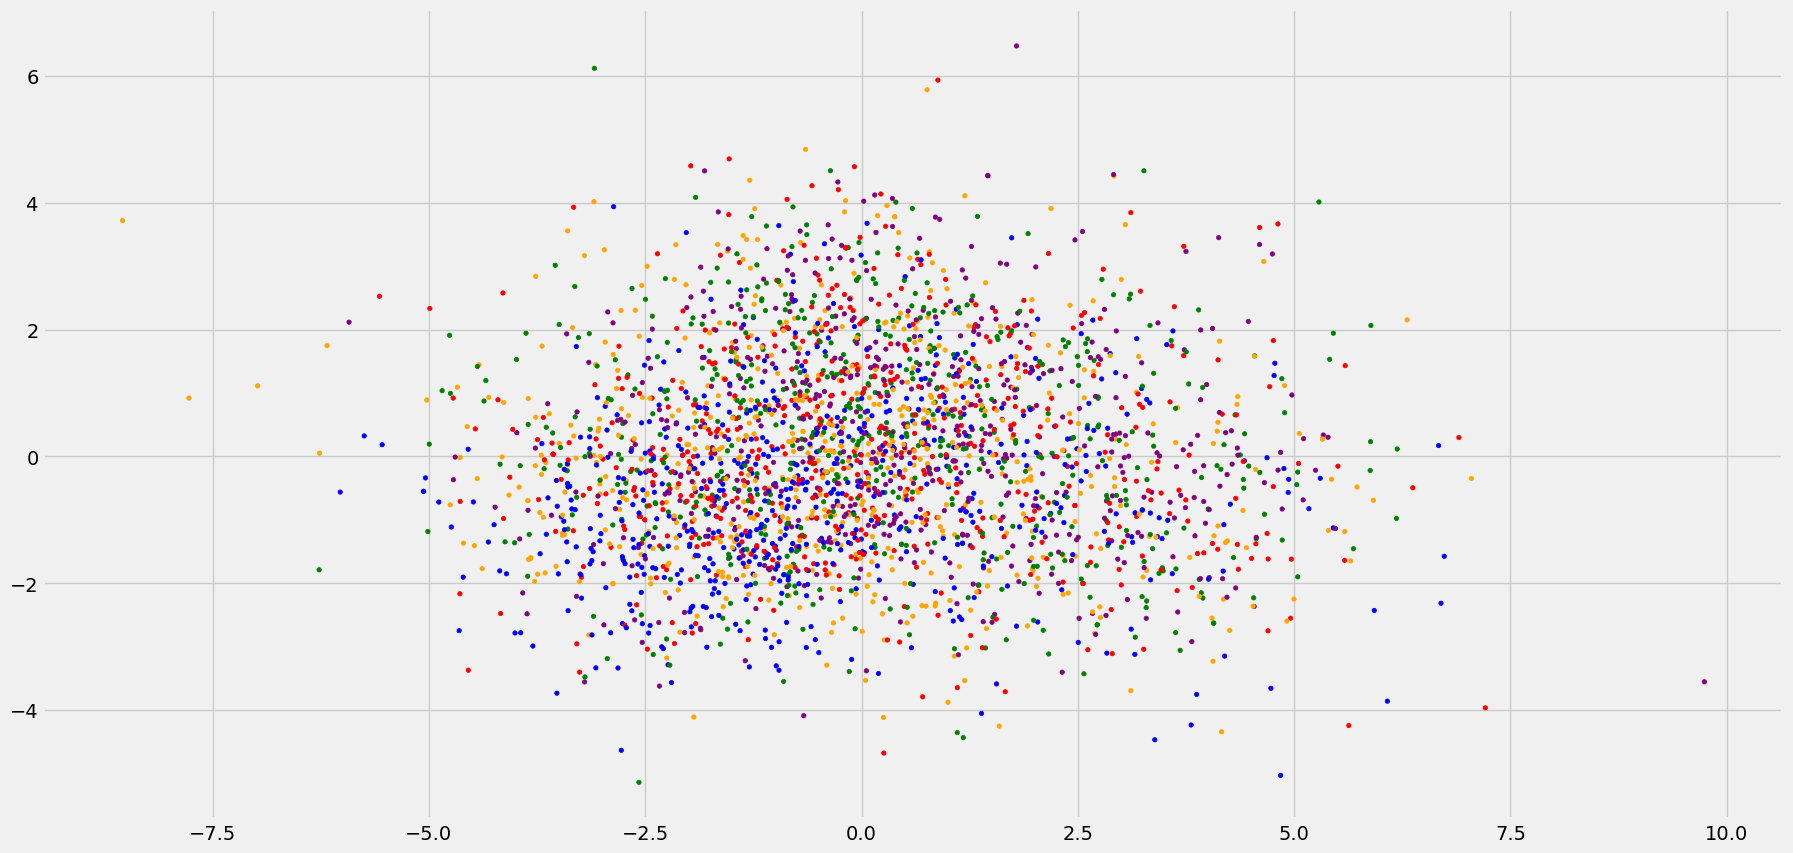

In [64]:
from sklearn.decomposition import PCA

#sampling the model_Word2Vec text
pca_df = model_Word2Vec.reset_index()
pca_df = model_Word2Vec.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::20]

#setting up PCA
pca = PCA(n_components=5, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["score"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["score"].map({0:"blue", \
                                 1:"red", \
                                 2:"purple", \
                                 3:"green", \
                                 4:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=10)
plt.show()

`We'll implement several interesting Natural Language Processing techniques in order to explore our dataset.`

## More on Word2Vec - EDA(Word similarity) ##
To better appreciate the concept of word embeddings, we take few common words in our corpora or from the `clean_text` column and derive their nearly five related words using our `word_vec` model. The similarity comes from how often these tokens appear in the same window of words as their `word_bank` counterpart.

In [65]:
# creating a function to find the similar words
def similar_word(word_bank):
    for word in word_bank[:]:
        related_vec = word_vec.wv.most_similar(word, topn=5)
        related_words = np.array(related_vec)[:,0]
        word_bank.extend(related_words)
        print(f"{word}: {related_words}")

In [66]:
word_bank = ["eat", "flavor", "awful", "good", "muffin", "dog"]

similar_word(word_bank)

eat: ['feed' 'munch' 'ate' 'snack' 'eaten']
flavor: ['taste' 'flavorbr' 'sweetness' 'aftertaste' 'flavoring']
awful: ['horrible' 'terrible' 'bad' 'nasty' 'disgust']
good: ['great' 'well' 'decent' 'goodbr' 'tasty']
muffin: ['cupcake' 'batter' 'frost' 'pancake' 'brownie']
dog: ['cat' 'puppy' 'pup' 'pet' 'yorkie']


# <center>Model Building with ML-Algorithms</center> #

## Machine Learning ##
We'll further process our finalized dataframe in order to make it compatible and easy to pipe into our Machine Learning model.

### Datasets ###

We have two different dataset generated using TF-IDF and Word2Vec. Dataset obtained with TF-IDF with all the features and  Word2Vec have 500 features. 

Datasets: `tfidf_mat` and `model_Word2Vec` 

We see that we now have a perfectly balanced dataset after we filtered the main dataset to have equally distributed dataset.

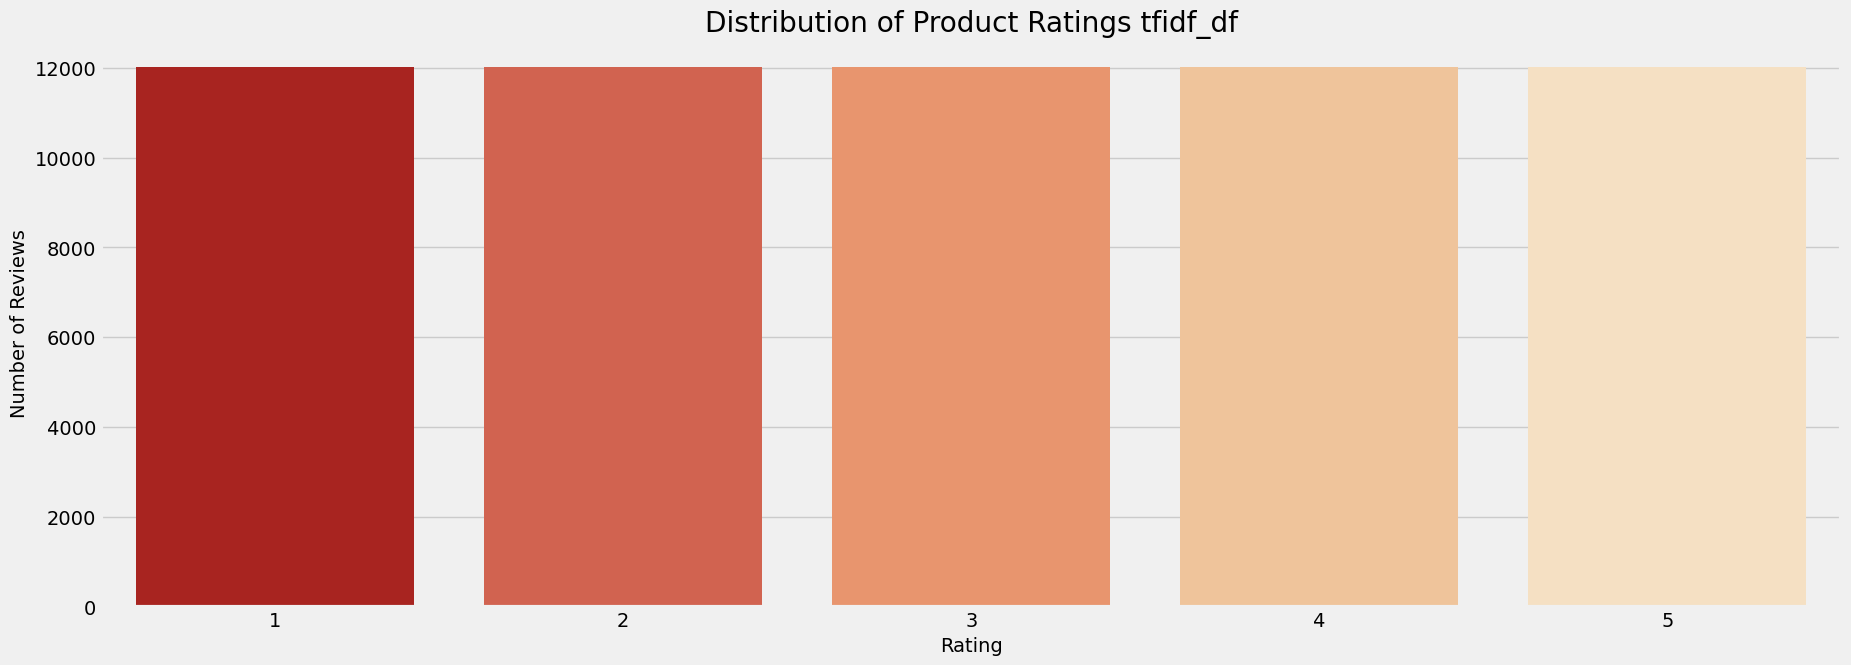

In [67]:
# in tfidf dataset

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=sample_df["Score"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings tfidf_df", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

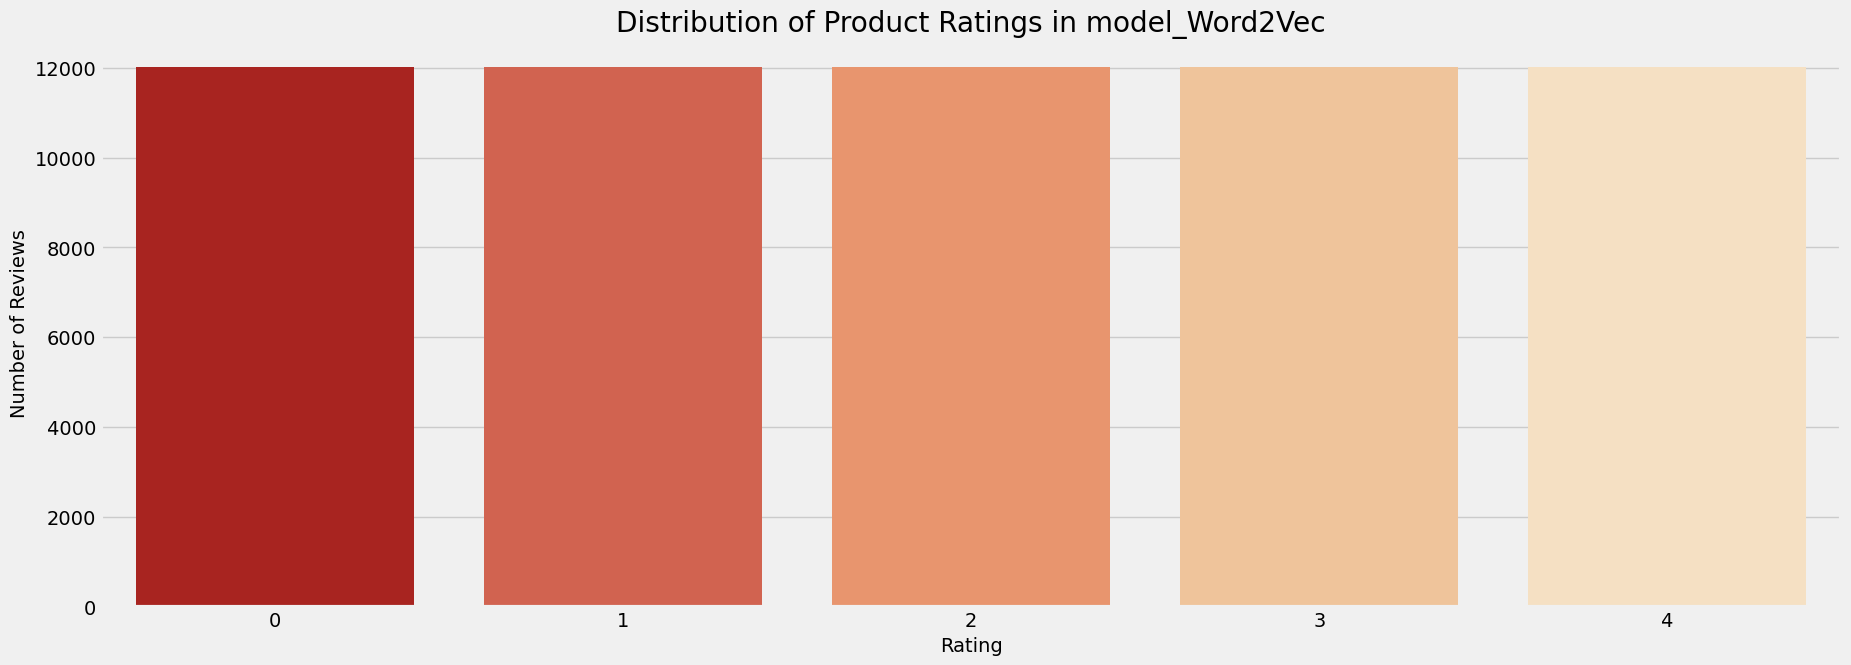

In [68]:
# in model_Word2Vec dataset

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=model_Word2Vec["score"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings in model_Word2Vec", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

## Scoring and Model Evaluation Techniques ##
In our study, we will make use of three metrics to measure the model performance:
* Accuracy
* F1 Score
* Confusion Matrix

*Accuracy will identify how many reviews are correctly labeled by the model. There are five ratings and thus five classes. No review can have two or more ratings and so the probability that a correct prediction is made from pure guesswork is `30%`.*

*The F1 score is taking *precision* and *recall* into consideration. Taking into account false positives and false negatives for each class is especially important in inherently imbalanced datasets.*

*A confusion matrix is a table that shows the true positive, false positive, true negative, and false negative values for each class. It provides an overview of the model's performance across all classes.*

**The baseline scores are for when a model only randomly guesses the output labels – in this case, when every prediction is the same class. The scores are also based on an evenly distributed dataset.**

## Train-Test Split ##
The `y` is our target variable or the labels for the data. The `X` constitutes the features and are the predictor variables.

We evenly split the training and testing sets and *stratify* to ensure the ratio of classes in both sets are identical.

In [72]:
# to create dependent and independent variables
def read_data(dataset):
    ''' Function to read the dataset'''
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    return X, y

# for train-test-split train:test :: 80:20
def prepare_data(X, y):
    ''' Function to split data on train and test set '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

# to run the classification model
def run_classification_models(X_train, X_test, y_train, y_test):
    # Logistic Regression
    lr = LogisticRegression(solver='sag',random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_train)
    x_pred = lr.predict(X_test)

    accuracy = metrics.accuracy_score(y_train, y_pred)
    f1_score = metrics.f1_score(y_train, y_pred, average='micro')
    print(f"Logistic Regression Accuracy for Train set: {accuracy*100:.3f}%")
    print(f"Logistic Regression F1 Score for Train set: {f1_score:.3f}\n")
    
    accuracy = metrics.accuracy_score(y_test, x_pred)
    f1_score = metrics.f1_score(y_test, x_pred, average='micro')
    print(f"Logistic Regression Accuracy for Test set: {accuracy*100:.3f}%")
    print(f"Logistic Regression F1 Score for Test set: {f1_score:.3f}\n")

    # Linear SVC
    svc = LinearSVC(random_state=42, class_weight={0:10, 1:12, 2:7, 3:9, 4:1},max_iter=1000)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_train)
    x_pred = svc.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_train, y_pred)
    f1_score = metrics.f1_score(y_train, y_pred, average='micro')
    print(f"Linear SVC Accuracy for Train set: {accuracy*100:.3f}%")
    print(f"Linear SVC F1 Score for Train set: {f1_score:.3f}\n")
    
    accuracy = metrics.accuracy_score(y_test, x_pred)
    f1_score = metrics.f1_score(y_test, x_pred, average='micro')
    print(f"Linear SVC Accuracy for Test set: {accuracy*100:.3f}%")
    print(f"Linear SVC F1 Score for Test set: {f1_score:.3f}\n")

    # Multinomial Naive Bayes or Gaussian Naive Bayes
    try:
        nb = MultinomialNB(alpha=0.5)
        nb.fit(X_train, y_train)
        y_pred = nb.predict(X_train)
        x_pred = nb.predict(X_test)

        accuracy = metrics.accuracy_score(y_train, y_pred)
        f1_score = metrics.f1_score(y_train, y_pred, average='micro')
        print(f"Multinomial Naive Bayes Accuracy for Train set: {accuracy*100:.3f}%")
        print(f"Multinomial Naive Bayes F1 Score for Train set: {f1_score:.3f}\n")
        
        accuracy = metrics.accuracy_score(y_test, x_pred)
        f1_score = metrics.f1_score(y_test, x_pred, average='micro')
        print(f"Multinomial Naive Bayes Accuracy for Test set: {accuracy*100:.3f}%")
        print(f"Multinomial Naive Bayes F1 Score for Test set: {f1_score:.3f}\n")
    except ValueError:
        print("Multinomial Naive Bayes raised an error, fitting Gaussian Naive Bayes instead...")
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        y_pred = gnb.predict(X_train)
        x_pred = gnb.predict(X_test)

        accuracy = metrics.accuracy_score(y_train, y_pred)
        f1_score = metrics.f1_score(y_train, y_pred, average='micro')
        print(f"Gaussian Naive Bayes Accuracy for Train set: {accuracy*100:.3f}%")
        print(f"Gaussian Naive Bayes F1 Score for Train set: {f1_score:.3f}\n")
        
        accuracy = metrics.accuracy_score(y_test, x_pred)
        f1_score = metrics.f1_score(y_test, x_pred, average='micro')
        print(f"Gaussian Naive Bayes Accuracy for Test set: {accuracy*100:.3f}%")
        print(f"Gaussian Naive Bayes F1 Score for Test set: {f1_score:.3f}\n")
        

    # Decision Tree Classifier
    dt = DecisionTreeClassifier(class_weight={0:10, 1:12, 2:7, 3:9, 4:1}, \
                                criterion="entropy", random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_train)
    x_pred = dt.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_train, y_pred)
    f1_score = metrics.f1_score(y_train, y_pred, average='micro')
    print(f"Decision Tree Classifier Accuracy for Train set: {accuracy*100:.3f}%")
    print(f"Decision Tree Classifier F1 Score for Train set: {f1_score:.3f}\n")
    
    accuracy = metrics.accuracy_score(y_test, x_pred)
    f1_score = metrics.f1_score(y_test, x_pred, average='micro')
    print(f"Decision Tree Classifier Accuracy for Test set: {accuracy*100:.3f}%")
    print(f"Decision Tree Classifier F1 Score for Test set: {f1_score:.3f}\n")

    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=25, class_weight={0:10, 1:12, 2:7, 3:9, 4:1}, \
                                criterion="entropy", random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    x_pred = rf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_train, y_pred)
    f1_score = metrics.f1_score(y_train, y_pred, average='micro')
    print(f"Random Forest Classifier Accuracy for Train set: {accuracy*100:.3f}%")
    print(f"Random Forest Classifier F1 Score for Train set: {f1_score:.3f}\n")
    
    accuracy = metrics.accuracy_score(y_test, x_pred)
    f1_score = metrics.f1_score(y_test, x_pred, average='micro')
    print(f"Random Forest Classifier Accuracy for Test set: {accuracy*100:.3f}%")
    print(f"Random Forest Classifier F1 Score for Test set: {f1_score:.3f}\n")

## Choosing the best ML Algorithm ##

Here, I have choosed 5 different classification algorithm mentioned below and running it using `run_classification_models` function. Using `read_data` and `prepare_data` function to create dependent and independent variable, then, perform `train_test_split`.

#### Algorithms are, ####

* Logistic Regression
* Linear SVC
* Multinomial Naive Bayes
* Decision Tree Classifier
* Random Forest Classifier

The `class_weight` attribute is provided with a dictionary that represents the associated weight of each class – the majority class is given a *1* and the rest are given the multiplying factor at which they would level with the largest class.

The criteria chosen is `entropy` which is similar to `gini` but instead of splitting nodes until there are pure classes, the nodes are split until the classes within have equal probability.

### Using TF-IDF Dataset ###

In [71]:
%%time
if __name__ == '__main__':
    X, y = tfidf_mat.T,model_Word2Vec.score
    X_train, X_test, y_train, y_test = prepare_data(X, y)
    run_classification_models(X_train, X_test, y_train, y_test)

Logistic Regression Accuracy for Train set: 71.247%
Logistic Regression F1 Score for Train set: 0.712

Logistic Regression Accuracy for Test set: 55.092%
Logistic Regression F1 Score for Test set: 0.551

Linear SVC Accuracy for Train set: 87.060%
Linear SVC F1 Score for Train set: 0.871

Linear SVC Accuracy for Test set: 52.490%
Linear SVC F1 Score for Test set: 0.525

Multinomial Naive Bayes Accuracy for Train set: 73.073%
Multinomial Naive Bayes F1 Score for Train set: 0.731

Multinomial Naive Bayes Accuracy for Test set: 51.359%
Multinomial Naive Bayes F1 Score for Test set: 0.514

Decision Tree Classifier Accuracy for Train set: 99.981%
Decision Tree Classifier F1 Score for Train set: 1.000

Decision Tree Classifier Accuracy for Test set: 43.744%
Decision Tree Classifier F1 Score for Test set: 0.437

Random Forest Classifier Accuracy for Train set: 99.981%
Random Forest Classifier F1 Score for Train set: 1.000

Random Forest Classifier Accuracy for Test set: 50.786%
Random Forest C

### Using Word2Vec Dataset ###

In [73]:
%%time
if __name__ == '__main__':
    X, y = read_data(model_Word2Vec)
    X_train, X_test, y_train, y_test = prepare_data(X, y)
    run_classification_models(X_train, X_test, y_train, y_test)

Logistic Regression Accuracy for Train set: 52.789%
Logistic Regression F1 Score for Train set: 0.528

Logistic Regression Accuracy for Test set: 50.387%
Logistic Regression F1 Score for Test set: 0.504

Linear SVC Accuracy for Train set: 46.589%
Linear SVC F1 Score for Train set: 0.466

Linear SVC Accuracy for Test set: 44.335%
Linear SVC F1 Score for Test set: 0.443

Multinomial Naive Bayes raised an error, fitting Gaussian Naive Bayes instead...
Gaussian Naive Bayes Accuracy for Train set: 39.656%
Gaussian Naive Bayes F1 Score for Train set: 0.397

Gaussian Naive Bayes Accuracy for Test set: 39.263%
Gaussian Naive Bayes F1 Score for Test set: 0.393

Decision Tree Classifier Accuracy for Train set: 99.981%
Decision Tree Classifier F1 Score for Train set: 1.000

Decision Tree Classifier Accuracy for Test set: 42.797%
Decision Tree Classifier F1 Score for Test set: 0.428

Random Forest Classifier Accuracy for Train set: 99.963%
Random Forest Classifier F1 Score for Train set: 1.000

Ra

## Motivation and Reasons For Choosing the Algorithm ##

As the problem given to classify the review made by the customer as per their ratings ranging 1 to 5. I have choosen 6 classification algorithms, i.e,  `LogisticRegression()`, `LinearSVC()`, `MultinomialNB()` or `GaussianNB()`, `DecisionTreeClassifier()`, `RandomForestClassifier()`, and `GradientBoostingClassifier()` in which `DecisionTreeClassifier()`, `RandomForestClassifier()` are performed much better with train set then others, and all of the models performing average with the test set, reason are mentioned below:

1. Accuracy: One of the most important factors when selecting a classifier algorithm is its accuracy in predicting the correct class labels for new, unseen data. Different algorithms may be better suited to different types of data or classification problems, but, **DecisionTreeClassifier** **RandomForestClassifier** performed well & obtain 99.981% and 99.973% respectively, for both of our obtained datasets.

2. Complexity: Another factor to consider is the complexity of the algorithm, both in terms of the amount of computational resources required to train and test the model, as well as the complexity of the resulting model itself. A simpler model may be easier to interpret and more efficient to compute, but may sacrifice some accuracy.

3. Scalability: The classifier algorithm should be able to scale to handle large datasets or high-dimensional feature spaces, while maintaining reasonable computational efficiency.

4. Interpretability: In some applications, it may be important to have a classifier algorithm that produces results that are easily interpretable by humans, so that they can be used to guide decision-making or to gain insights into the underlying data.

## Outcomes ##

* Logistic Regression:
> 1. I tried different hyper-parameter tunning, `penalty`:`{'l1', 'l2'}`, where model started lowe the accuracy. It seems hyper parameter(λ) is very large which causing the model to underfit
> 2. At last, after trying `class_weight`, `solver` and `random_state`, still model not performed better, so tried to train it without `class_weight` and got 10.8% for *tfidf_df* & 13.2% for *model_Word2Vec* rise in train_set accuracy.
* Linear SVC
> 1. This model also not performed well with different parameter, model started to show convergence error but it got resolved by specifying `max_iter` and `penalty` but it tends to time complexity to run the model.
> 2. `class_weight` and `random_state` helps to achieve 2% more accuracy which is result 44% & 47% for both the datasets.
* Multinomial Naive Bayes
> 1. This model have the worst accuracy in all, and get ValueError as *model_Word2Vec* have negetive values so fitted `GaussianNB` instead.
> 2. used different alpha value ranging (0.1, 0.7), accuracy not increased at all.
* Decision Tree Classifier
> 1. Model gives 99% accuracy on train_data with `class_weight` `criterion:entropy` `random_state`
* Random Forest Classifier
> 1. This model also gives 99% accuracy on train_data with some tunning, i.e, `class_weight` `criterion:entropy` `random_state`
> 2. `n_estimators` used and trained it with 25, 50 and 100 but model gives accuraccy with estimator:25

## Assumtions ##
After running all the different models, I have observed that models are performing enough to get approx. prediction and most of all are performing well, the reason being the number of classes we have, as I am presuming that most of the words are almost similar, the models trained with this and predicted nearby classes, but not accurate as per the true target label.

Now, I am proceeding with the Random Forest classifier for the final model building. Post, I will also be moving forward to fit a Bi-LSTM model using Pad sequence and Word embedding method with TensorFlow.

So, I need to prefer to proceed with three classes to obtain a good model, thereafter, we can proceed with the `Deep Neural Network - Word Embedding` having all 5 classes to obtain a good model in all.

So, the final models to proceeds are as follows:

>a. Random Forest Classifier

>b. Bi-LSTM with Word Embedding

##  Model Evaluation and Techniques ## 

####  1.Model Evaluations:TF-IDF #### 

In [74]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true, predicted, model,df_type):
    #create the confusion matrix of the training set
    confusion_train = confusion_matrix(true, predicted)
    confusion_train = confusion_train.astype("float") / \
                       confusion_train.sum(axis=1)[:, np.newaxis]
    confusion_train = np.around(confusion_train, decimals=3)*100

    #create confusion matrix heat map
    f, axes = plt.subplots(figsize=(20,10))
    im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

    axes.figure.colorbar(im, ax=axes)
    axes.set(title=f"Confusion Matrix for {df_type} Set:{model}", \
             xticks=np.arange(confusion_train.shape[1]), \
             yticks=np.arange(confusion_train.shape[0]), \
             xticklabels=range(1, 6), yticklabels=range(1, 6), \
             xlabel="Predicted", ylabel="Truth")

    #add clear annotations to the confusion matrix
    threshold = confusion_train.max()/1.5
    for i in range(confusion_train.shape[0]):
        for j in range(confusion_train.shape[1]):
            axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                    ha="center", va="center",
                    color="white" if confusion_train[i, j] > threshold else "black")
    f.tight_layout()
    plt.grid(False)
    plt.show()

## Final Model Building: RandomForest ##

#### Fitting Model with tfidf ####

In [75]:
X, y = tfidf_mat.T, sample_df['Score']-1

# splitting tfidf dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42, stratify=y)

# defining the model
classifier_tfidf = RandomForestClassifier(n_estimators=25, class_weight={0:10, 1:12, 2:7, 3:9, 4:1}, \
                                criterion="entropy", random_state=42)
# fitting model
classifier_tfidf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 10, 1: 12, 2: 7, 3: 9, 4: 1},
                       criterion='entropy', n_estimators=25, random_state=42)

#### Model Evaluation - Predicting Accuracy and plotting Confusion Matrix - TF-IDF ####

Random Forest Classifier Accuracy(TF-IDF) Train_set: 99.981%
Random Forest Classifier F1 Score(TF-IDF) Train_set: 1.000



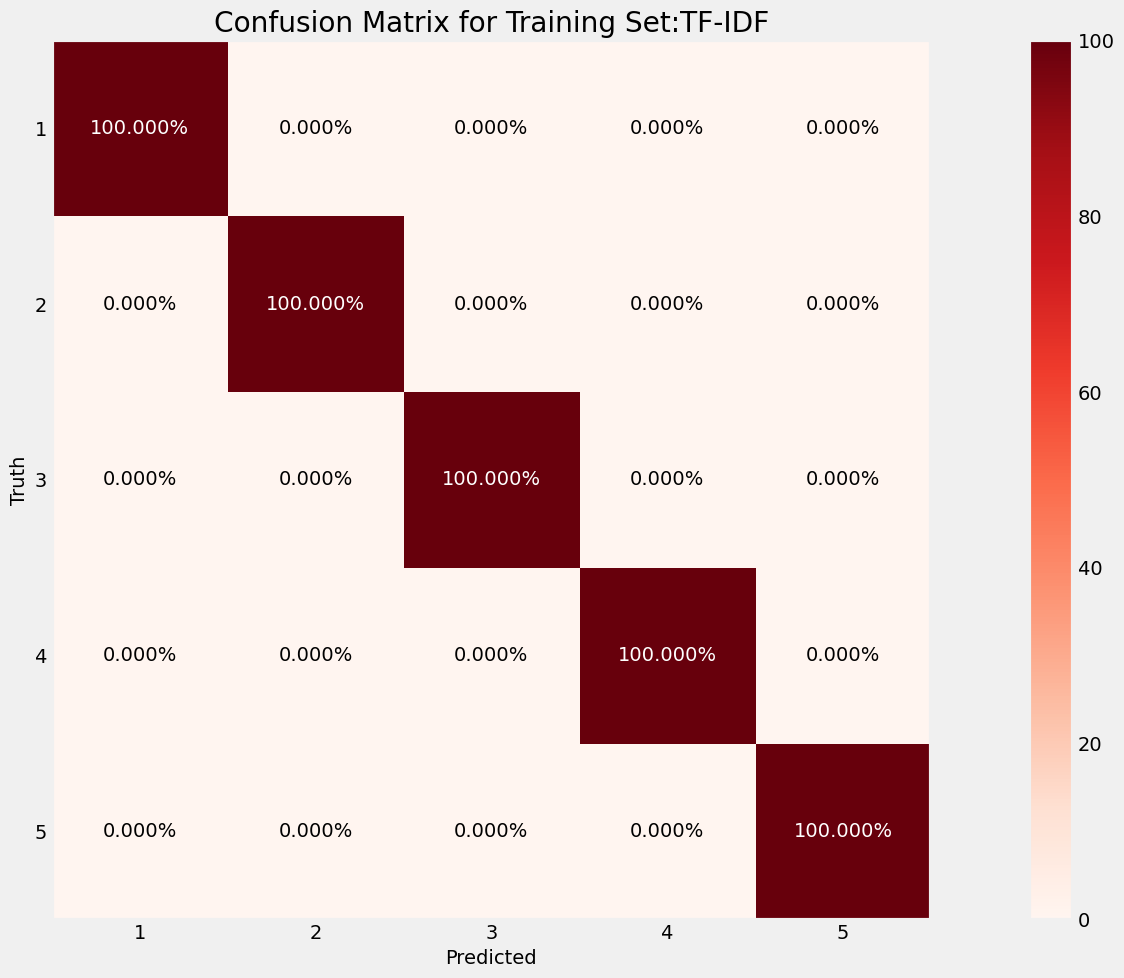

In [76]:
# predicting train set
y_pred_training = classifier_tfidf.predict(X_train)

# checking the accuracy and f1_score - train set
accuracy = metrics.accuracy_score(y_train, y_pred_training)
f1_score = metrics.f1_score(y_train, y_pred_training, average='micro')

print(f"Random Forest Classifier Accuracy(TF-IDF) Train_set: {accuracy*100:.3f}%")
print(f"Random Forest Classifier F1 Score(TF-IDF) Train_set: {f1_score:.3f}\n")

plot_confusion_matrix(y_train, y_pred_training,'TF-IDF', 'Training')

Random Forest Classifier Accuracy(TF-IDF) Test_set: 50.786%
Random Forest Classifier F1 Score(TF-IDF) Test_set: 0.508



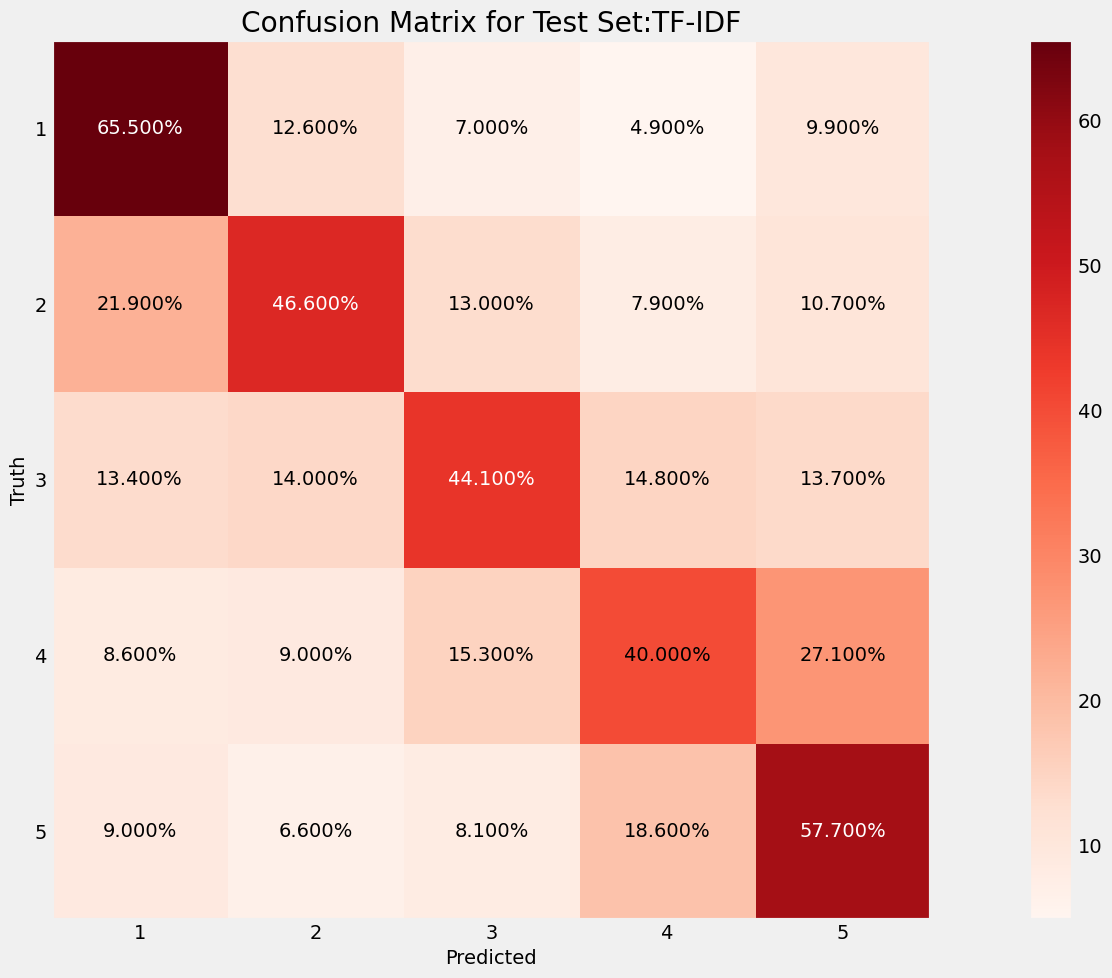

In [77]:
# predicting test set
y_pred_test = classifier_tfidf.predict(X_test)

# checking the accuracy and f1_score - test set
accuracy_tfidf = metrics.accuracy_score(y_test, y_pred_test)
f1_score_tfidf = metrics.f1_score(y_test, y_pred_test, average="micro")

print(f"Random Forest Classifier Accuracy(TF-IDF) Test_set: {accuracy_tfidf*100:.3f}%")
print(f"Random Forest Classifier F1 Score(TF-IDF) Test_set: {f1_score_tfidf:.3f}\n")

plot_confusion_matrix(y_test, y_pred_test,'TF-IDF', 'Test')

#### Fitting Model with Word2Vec ####

In [78]:
# Splitting dataset dependent and independent variable
X = model_Word2Vec.iloc[:, :-1]
y = model_Word2Vec.iloc[:, -1]

# Splitting data into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=42, stratify=y)

In [79]:
# defining the model
classifier_Word2Vec = RandomForestClassifier(n_estimators=25, class_weight={0:10, 1:12, 2:7, 3:9, 4:1}, \
                                criterion="entropy", random_state=42)
# fitting model
classifier_Word2Vec.fit(Xtrain, ytrain)
y_pred_train_ = classifier_Word2Vec.predict(Xtrain)

#### Model Evaluation - Predicting Accuracy and plotting Confusion Matrix - Word2Vec ####

Random Forest Classifier Accuracy(Word2Vec) Train_set: 99.963%
Random Forest Classifier F1 Score(Word2Vec) Train_set: 1.000



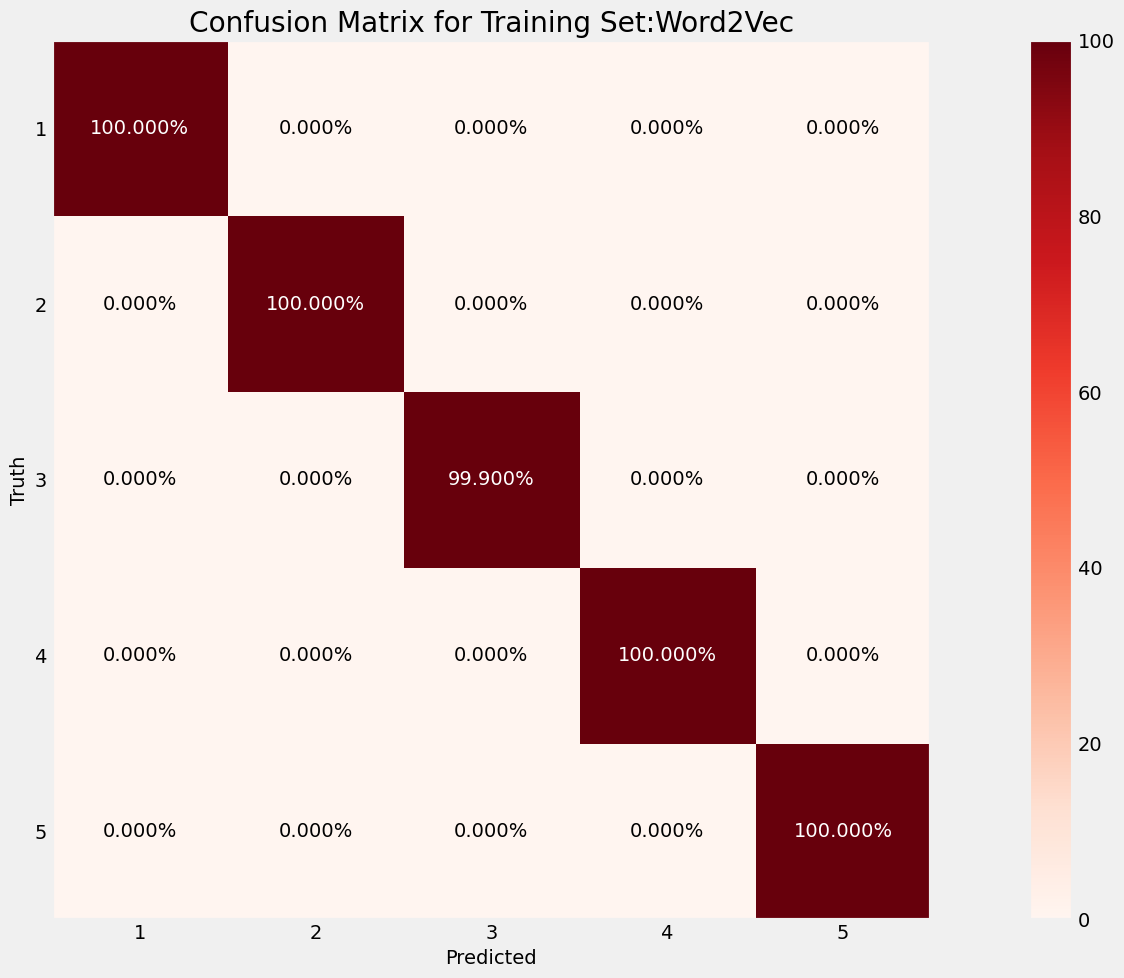

In [80]:
accuracy = metrics.accuracy_score(ytrain, y_pred_train_)
f1_score = metrics.f1_score(y_train, y_pred_train_, average='micro')
print(f"Random Forest Classifier Accuracy(Word2Vec) Train_set: {accuracy*100:.3f}%")
print(f"Random Forest Classifier F1 Score(Word2Vec) Train_set: {f1_score:.3f}\n")

plot_confusion_matrix(ytrain, y_pred_train_,'Word2Vec', 'Training')

Random Forest Classifier Accuracy(Word2Vec) Test_set: 49.638%
Random Forest Classifier F1 Score(Word2Vec) Test_set: 0.496



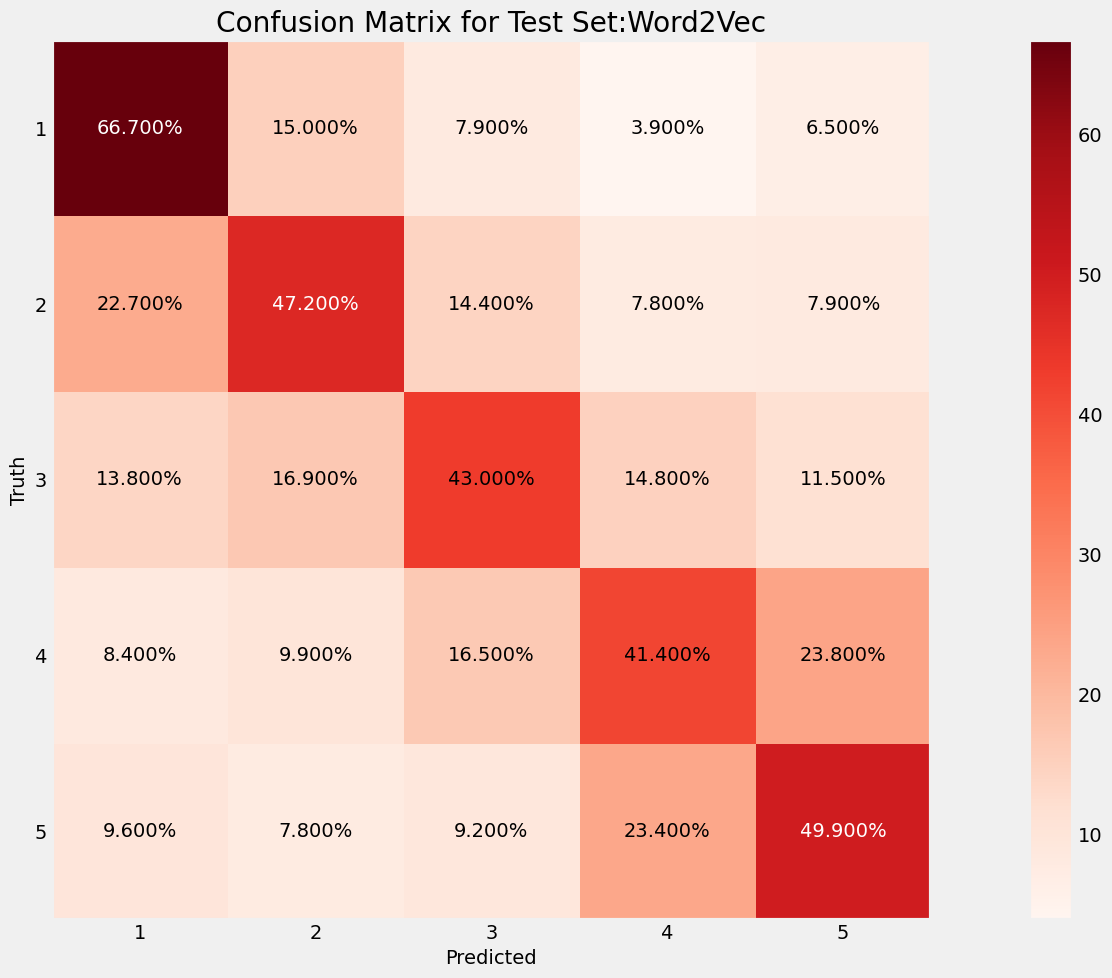

In [81]:
y_pred_test_ = classifier_Word2Vec.predict(Xtest)
accuracy = metrics.accuracy_score(ytest, y_pred_test_)
f1_score = metrics.f1_score(ytest, y_pred_test_, average='micro')
print(f"Random Forest Classifier Accuracy(Word2Vec) Test_set: {accuracy*100:.3f}%")
print(f"Random Forest Classifier F1 Score(Word2Vec) Test_set: {f1_score:.3f}\n")

plot_confusion_matrix(ytest, y_pred_test_,'Word2Vec', 'Test')

# Proceeding With Bi-LSTM Model #

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [84]:
tf.__version__

'2.10.0'

In [85]:
tf.test.is_built_with_cuda()

True

In [86]:
# Splitting the data into train & test
X = sample_df['clean_text']
y = sample_df['Score'] - 1

x_train_, x_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# defining attributes for Tokenizing the words and create Pad sequencing array
max_length=100
vocab_size=13000
embedding_dim=64
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"

In [93]:
# tokenizing
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index

# creating trainning sequence
training_sequences = tokenizer.texts_to_sequences(x_train_)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, 
                                truncating=trunc_type)

# creating testing sequence
testing_sequences = tokenizer.texts_to_sequences(x_test_)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, 
                               truncating=trunc_type)

In [97]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(256, dropout=0.3)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           832000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              657408    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,522,565
Trainable params: 1,522,565
No

In [98]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
history=model.fit(training_padded,y_train_, epochs=50, batch_size=256,
                  verbose = 1,validation_data=(testing_padded,y_test_))

Epoch 1/50
188/188 [==============================] - 11s 40ms/step - loss: 1.4392 - accuracy: 0.3442 - val_loss: 1.2301 - val_accuracy: 0.4699
Epoch 2/50
188/188 [==============================] - 7s 37ms/step - loss: 1.1742 - accuracy: 0.4922 - val_loss: 1.1658 - val_accuracy: 0.5010
Epoch 3/50
188/188 [==============================] - 7s 37ms/step - loss: 1.0944 - accuracy: 0.5338 - val_loss: 1.1626 - val_accuracy: 0.5106
Epoch 4/50
188/188 [==============================] - 7s 38ms/step - loss: 1.0431 - accuracy: 0.5598 - val_loss: 1.1595 - val_accuracy: 0.5140
Epoch 5/50
188/188 [==============================] - 7s 38ms/step - loss: 0.9919 - accuracy: 0.5885 - val_loss: 1.1698 - val_accuracy: 0.5094
Epoch 6/50
188/188 [==============================] - 7s 38ms/step - loss: 0.9463 - accuracy: 0.6105 - val_loss: 1.1740 - val_accuracy: 0.5217
Epoch 7/50
188/188 [==============================] - 7s 37ms/step - loss: 0.9015 - accuracy: 0.6338 - val_loss: 1.1786 - val_accuracy: 0.521

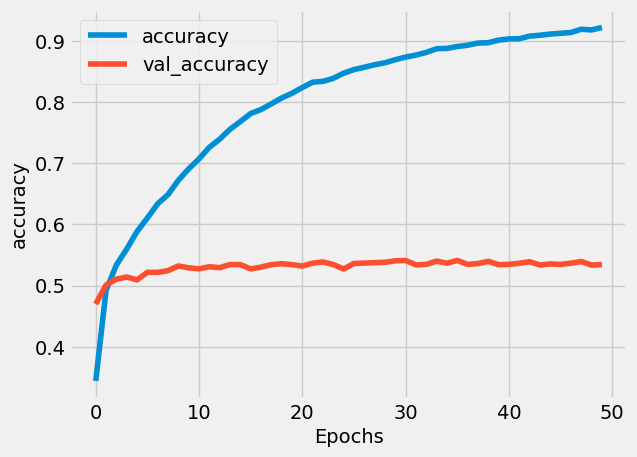

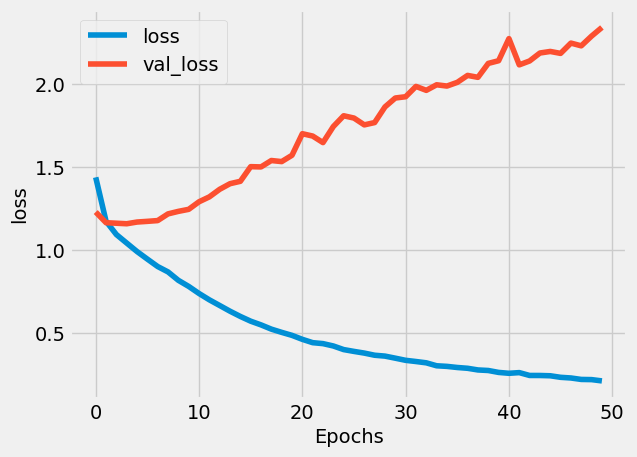

In [117]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [113]:
def Review(sentence):
    sequences = tokenizer.texts_to_sequences(sentence)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    prob=model.predict(padded)
    index = np.argmax(prob)
    
    if index == 0:
        label = 'Very-unsatisfied'
        print(f"The customer rated: {index+1}, to this product. However, the sentiment for the product quality is {label}.")
    elif index == 1:
        label = 'Unsatisfied'
        print(f"The customer rated: {index+1}, to this product. However, the sentiment for the product quality is {label}.")
    elif index == 2:
        label = 'Neutral'
        print(f"The customer rated: {index+1}, to this product. However, the sentiment for the product quality is {label}.")
    elif index == 3:
        label = 'Satisfied'
        print(f"The customer rated: {index+1}, to this product. However, the sentiment for the product quality is {label}.")
    else:
        label = 'Very-satisfied'
        print(f"The customer rated: {index+1}, to this product. However, the sentiment for the product quality is {label}.")

In [115]:
sentence=['Good Product and it fits me']
Review(sentence);

1/1 [==============================] - 0s 28ms/step
The customer rated: 4, to this product. However, the sentiment for the product quality is Satisfied.


In [116]:
sentence=['this is worst thing ever']
Review(sentence)

1/1 [==============================] - 0s 28ms/step
The customer rated: 1, to this product. However, the sentiment for the product quality is Very-unsatisfied.


**Inference:** The prediction with random words was possibly accurate, but we can't conlude the difference between the ratings, like, which sentence would be marked or rated from 1 to 5.

In [131]:
# Predicting the Test set results
y_pred = model.predict(testing_padded)

# creating a list having the possible prediction
predicted_rating = []

for i in range(len(y_pred)):
    val = np.argmax(y_pred[i])
    predicted_rating.append(val)

predicted_rating = pd.Series(predicted_rating)
predicted_df = pd.DataFrame()

predicted_df['real'] = y_test_
predicted_df['predicted'] = predicted_rating

376/376 [==============================] - 4s 10ms/step


**Inference:** As, I mentioned earlier, we can see probability of prediction are not accurate and `argmax` failed to obtain a natural number between 1 to 5, due to this `predicted_df - predicted` have *NaN* values.

In [134]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [153]:
accuracy = accuracy_score(y_test_, predicted_rating)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test_, predicted_rating, average='micro')
print('Precision: %f' % precision)

recall = recall_score(y_test_, predicted_rating, average='micro')
print('Recall: %f' % recall)

f1 = f1_score(y_test_, predicted_rating, average='micro')
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test_, y_pred, multi_class='ovr') #np.array(predicted_rating).reshape(-1,1)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test_, predicted_rating)
print(f"Confusion Matrix: \n{matrix}")

Accuracy: 0.534542
Precision: 0.534542
Recall: 0.534542
F1 score: 0.534542
ROC AUC: 0.804923
Confusion Matrix: 
[[1469  521  238   87   85]
 [ 436 1280  381  180   81]
 [ 240  495 1216  375  152]
 [ 113  222  394 1136  504]
 [ 127  132  211  625 1329]]


**Inference:** Here, The TF - WordEmbedding model performed better then other models, but, ROC AUC score are more convenient then other score. However, the probability of predicted on the unseen data is better then all the models we have trained with both of our dataset.

In [143]:
#Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_rating))

              precision    recall  f1-score   support

           0       0.19      0.19      0.19      2406
           1       0.21      0.23      0.22      2405
           2       0.20      0.20      0.20      2406
           3       0.20      0.20      0.20      2406
           4       0.21      0.18      0.19      2406

    accuracy                           0.20     12029
   macro avg       0.20      0.20      0.20     12029
weighted avg       0.20      0.20      0.20     12029



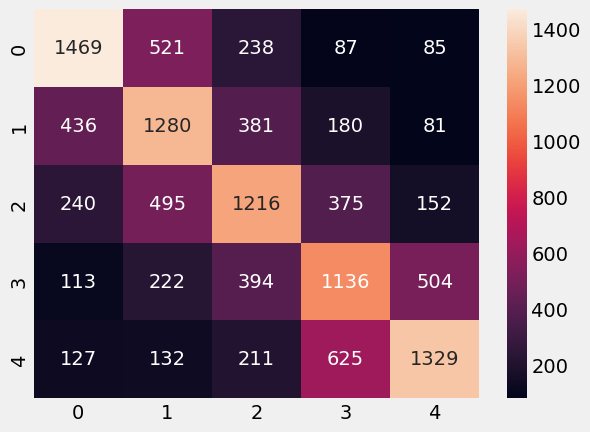

In [151]:
#Confusion Matrix
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='');

# Saving Obtained Model #

In [156]:
# saving the RandomForest classifier
import pickle

filename = 'RandomForest_tfidf.pkl'
pickle.dump(classifier_tfidf, open(filename, 'wb'))

filename = 'RandomForest_word2vec.pkl'
pickle.dump(classifier_Word2Vec, open(filename, 'wb'))

# saving the TensorFlow WordEmbedding model
model.save("WordEmbedding_tf.h5")

# saving the Word2Vec model to classify the similar word
word_vec.save('Similarity_word2vec.h5')

# Conclusion #
A lot of Natural Language Processing techniques were covered in the study. Just some of the concepts explored include topic modeling – where similar/neighbouring texts were clustered together according to topic. Though the *Word2Vec* phase was central to our final model, the pre-processing steps were perhaps just as crucial. Prior to tokenization, each document had to be decoded from UTF and encoded to ASCII, and converted to lowercase. The texts were stripped of accents, stop words and punctuation, and multiple whitespaces were dropped. Words were simplified to their root words in order to compact the vocabulary as much as possible. Tokens that were often used together were also singularized through phrase modeling.

Beyond word use and word frequency, our model actually extracts and quantifies *context*. Every token in all the reviews are understood by their neighboring words and embedded in a given number of dimensions. All the interactions of a word with all the other words it has been associated with are expressed in vectors. And all the words in a given review are averaged according to each of the dimensions to create its `500` features. So the essence of a review by its words make up the final dataframe.

What we have is a multi-class model where each of the five classes correspond to a review’s star rating. This is then a discrete approach where each class is independent of each other. In a situation where a 5-star rating is misinterpreted by the model as a 1-star review, then the model has simply misclassified – it is agnostic to how far off `1` and `5` are. This is in contrast with a *continuous* approach whereas a misclassification of a 5-star review as a 1-star review would be more penalizing. Our model then is reliant on the distinction of each kind of review. 

**It is more concerned in asking "*What makes a 5-star review different from a 4-star review?*" than asking "*Is this review more approving than criticizing?*" having, a model trainned with the less number of classes will be much better then we have for now.** 

## Limitations and Recommendations ##
Though we have observed satisfactory results in our model compared to the baseline, there are several limitations in the way the model handles data. These could serve as areas of improvement. First, despite a rich vocabulary, the model will not be able to handle words that it has not encountered during training. In fact, if an unknown word appears in a review, the word is dropped from the dimension-averaging step since has not  been referenced in our `word_vec_df`. However, i have also tried to create proceed along with TF-IDF, so, I have created a vector with all the features to over come the possible issues.

Because each word is simplified by lemmatization during pre-processing, then alternate forms of a token shouldn’t necessarily be a concern. However, the model cannot identify if a word is misspelled and will identify one simply as a new word. Incorporating a spellchecker would add to the computational cost and will certainly add to the model’s complexity.

Finally, as is usually the case in NLP, sarcasm or text that is intended to be ironic is interpreted by what is literally in the text and not by its underlying context. Because sarcasm is usually detected by readers through the mood and sentiment of the document, it takes adding another layer of NLP just to approximate whether the review is sarcastic or not in order to properly work with such text. This supplement layer will not only utilize tagged sarcastic text as supervised labels, but must also consider the review’s given product rating in its judgment to detect sarcasm.

